# Measuring Development of countries over 20 years
# Exploring Socioeconomic Indicators and Urbanization Rates Across Nations 🌍

# CODE 1161 DATA PROJECT
# Z5340777



# I wanted to understand how countries have progressed in these three important aspects: incomeperperson, internetuserate and urbanrate


# Important note

# Income per person (gdp per capita): calucated in usd dollars and has not been adjusted for inflation

# Internetuserate: internet users (per 100 people) people with access to the internet

# Urbanrate: The amount of people living in urban areas and its devoplment over time



# Sources
Comparing two datasets

For year 2000 dataset
https://www.kaggle.com/datasets/sansuthi/gapminder-internet

2020 dataset
urban rate: https://data.worldbank.org/indicator/SP.URB.TOTL.IN.ZS
income: https://data.worldbank.org/indicator/NY.GDP.PCAP.CD
internet: https://data.worldbank.org/indicator/IT.NET.USER.ZS
https://youtu.be/TDlo7s4SZA8


`imports`, you've seen this before!

In [1]:
# Import the 'matplotlib' library for data visualization
import matplotlib
# Import the 'pyplot' submodule from 'matplotlib' for creating plots
import matplotlib.pyplot as plt
# Import the 'numpy' library for numerical computations
import numpy as np
# Import the 'pandas' library for data manipulation and analysis
import pandas as pd
# Import the 'os' module for interacting with the operating system
import os
# Import the 'datetime' class from the 'datetime' module for working with dates and times
from datetime import datetime
# Import the 'seaborn' library for enhanced data visualization
import seaborn as sns
# Import the 'graph_objects' submodule from 'plotly' for creating interactive visualizations
import plotly.graph_objects as go
# Import the 'display' function from 'IPython.display' for displaying objects in IPython environments
from IPython.display import display


Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [2]:
%matplotlib inline

Set the size of the plots that will come out when we ask for them. Annoyingly, these are in inches. Whatever an "inch" is

In [3]:
plt.rcParams["figure.figsize"] = (10, 5)


In [4]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to


Let's check to see if we've already downloaded the data. It's a big file, so we don't want to do it every time we run the code. Even just loading from file takes a few seconds!

Pandas is pretty smart, it can get data from the internet just as easily as from the file system, it just takes a bit longer.


In [5]:

data2 = pd.read_csv("gapminder_internet.csv")
data1 = pd.read_csv("2020dataset.csv")

print("done")

done


# Lets look at the dataset

In [6]:
data2.head(60) #213 countries, territories and nations

,country,incomeperperson,internetuserate,urbanrate,continent
0,Afghanistan,NaN,3.654122,24.04,Asia
1,Albania,1914.996551,44.989947,46.72,Europe
2,Algeria,2231.993335,12.500073,65.22,Africa
3,Andorra,21943.339900,81.000000,88.92,Europe
4,Angola,1381.004268,9.999954,56.70,Africa
5,Antigua and Barbuda,11894.464070,80.645455,30.46,North America
6,Argentina,10749.419240,36.000335,92.00,South America
7,Armenia,1326.741757,44.001025,63.86,Asia
8,Aruba,NaN,41.800889,46.78,South America
9,Australia,25249.986060,75.895654,88.74,Oceania


# The missing information for these places in the list can be attributed to various factors, such as data availability, data collection methodologies, political situations, and economic conditions. 


**Asia:**
- Afghanistan: Ongoing conflict and political instability.
- Korea, Dem. Rep. (North Korea): Isolation and lack of transparency.
- Myanmar: Political unrest and limited access to certain areas.

**South America:**
- Aruba: Data unavailability or inaccessibility.

**North America:**
- Cayman Islands, Guadeloupe, Martinique, Netherlands Antilles: Smaller territories with lower data collection priority.
- Saint Vincent and the Grenadines: Limited resources and data infributing to its data gaps.



**Oceania:**
- Cook Islands, French Polynesia, Guam, Nauru, New Caledonia, Niue: Remote or small territories with data collection challenges.
- Marshall Islands, Palau, Tuvalu: Remote locations and limited resources.

**Europe:**
- Faeroe Islands: Small population and limited resources.
- Gibraltar: Political status and sovereignty issues.

**Africa:**
- Reunion: Remote location or data prioritization challenges.
- Sao Tome and Principe, Somalia, Sudan: Political instability and conflict.
- Sierra Leone: Limited resources and data infrastructure.

# Maps of all countries with values year 2000 🗺

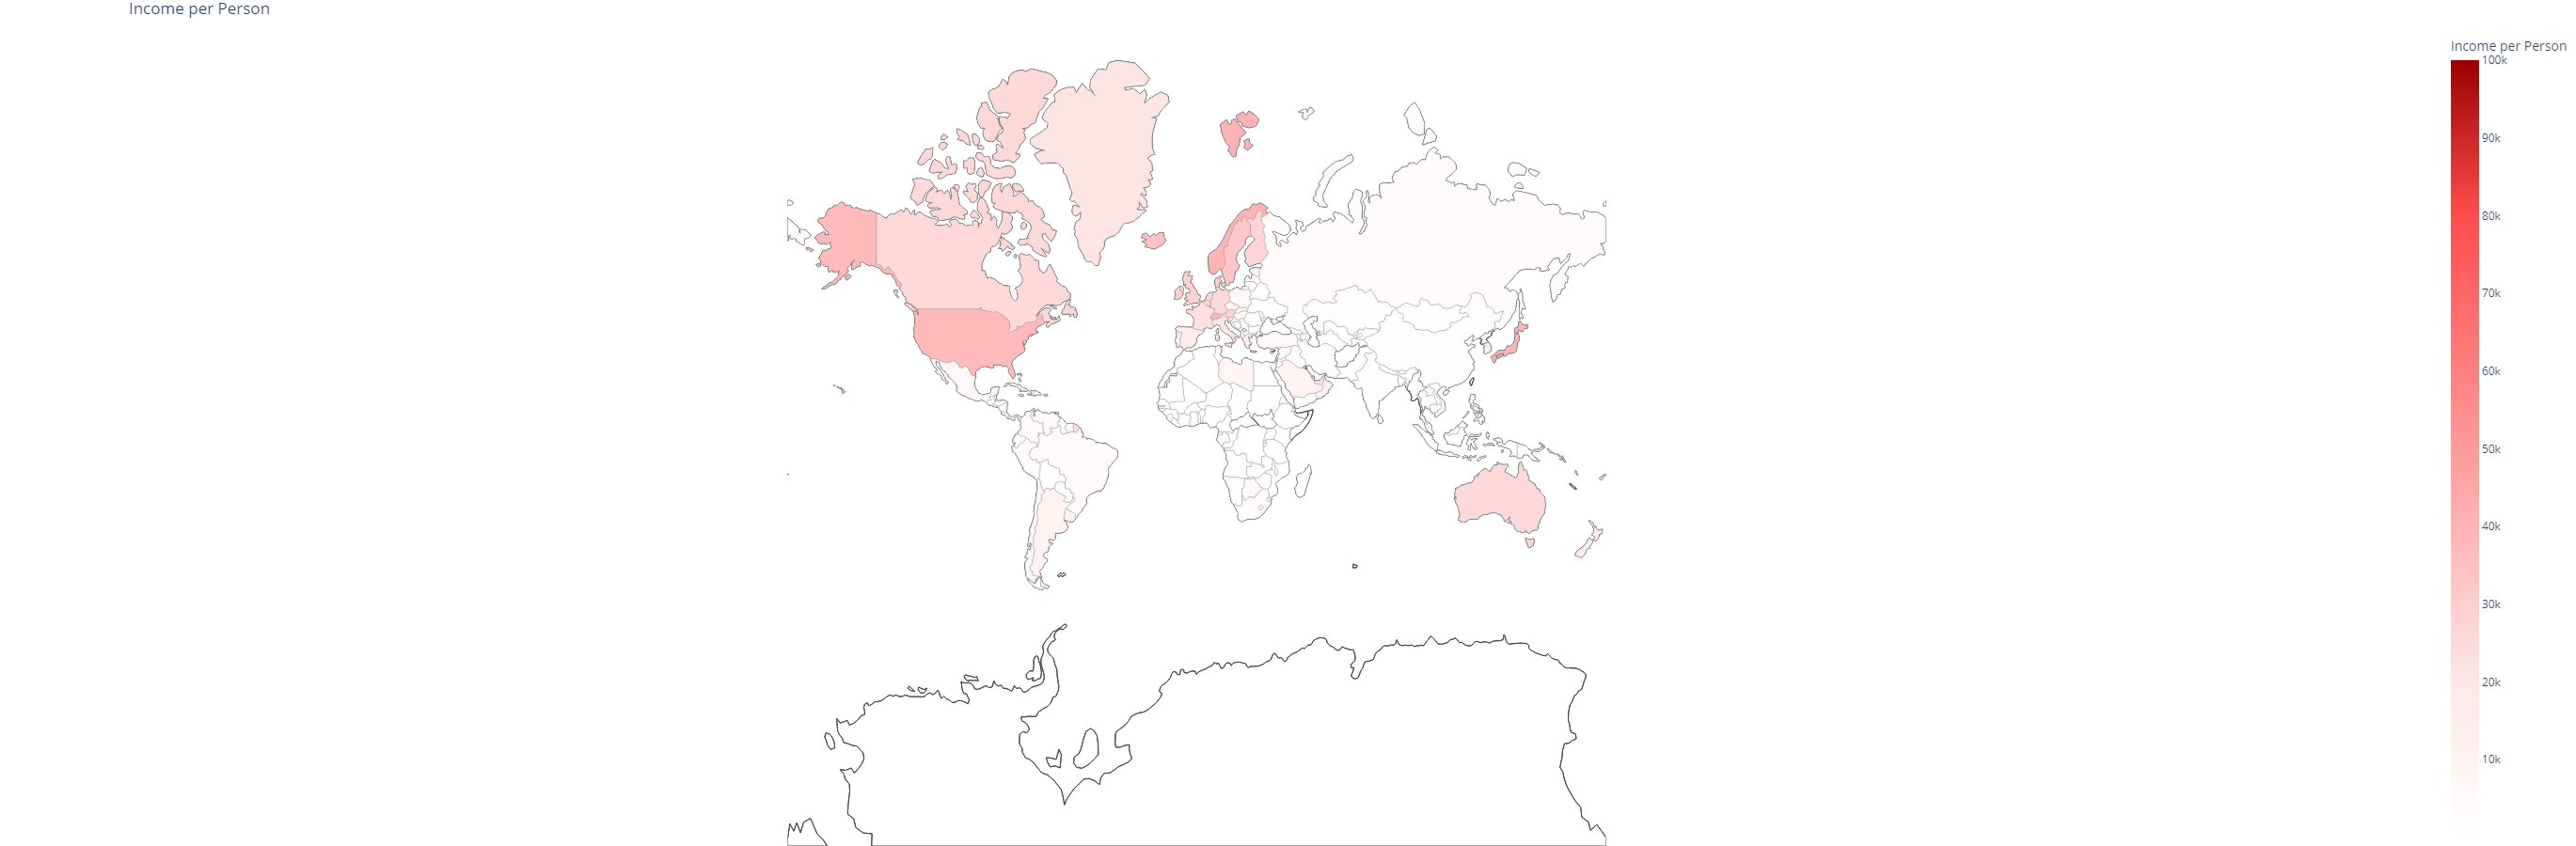

In [43]:
# Load the CSV data into a DataFrame
df = pd.read_csv('gapminder_internet.csv')

# Define a function to create a choropleth map figure
def create_map_figure(z_data, colorscale, title, colorbar_title, reversescale=False):
    # Initialize an empty Plotly figure
    fig = go.Figure()

    # Create a Choropleth trace for the map
    trace = go.Choropleth(
        locations=df['country'],               # List of country names for map locations
        locationmode='country names',          # Specify location mode as country names
        z=z_data,                              # Data values for colouring the map
        text=df['country'],                    # Text to display on hover over map
        hovertemplate="<b>%{text}</b><br><br>" + title + ": %{z:,.2f}<extra></extra>",  # Hover template for tooltip
        colorscale=colorscale,                 # Colour scale for mapping values to colours
        reversescale=reversescale,             # Reverse the colour scale if True (for income data)
        colorbar=dict(title=colorbar_title),   # Title for the colour bar
        marker_line_color='darkgray',          # Colour of the border lines for map markers
        marker_line_width=0.5                  # Width of the border lines for map markers
    )

    # Add the Choropleth trace to the figure
    fig.add_trace(trace)

    # Update geographical layout settings
    fig.update_geos(
        visible=False,                         # Set map visibility to False initially
        showcountries=True,                    # Show country boundaries
        showcoastlines=True,                   # Show coastlines
        projection_type="mercator"             # Use Mercator projection for the map
    )

    # Update overall layout settings
    fig.update_layout(
        title=title,                           # Set the title of the map
        geo=dict(
            showframe=False,                    # Hide map frame
            showcoastlines=True,                # Show coastlines
            projection_type="mercator"          # Use Mercator projection for the map
        ),
        margin=dict(l=0, r=0, t=30, b=0),        # Adjust margins for the map
        width=1200,                             # Set the width of the map box
        height=900                             # Set the height of the map box
    )

    return fig

# Define a custom colour scale for income per person
red_scale = [
    [0.0, 'rgb(255, 255, 255)'],               # White for the lowest values (indicating low income)
    [0.2, 'rgb(255, 230, 230)'],               # Light red for slightly higher income
    [0.4, 'rgb(255, 179, 179)'],               # Medium light red for moderately higher income
    [0.6, 'rgb(255, 128, 128)'],               # Medium red for further increased income
    [0.8, 'rgb(255, 77, 77)'],                 # Medium dark red for even higher income
    [1.0, 'rgb(153, 0, 0)']                    # Dark red for the highest values (indicating high income)
]

# Create the world map for income per person with the custom colour scale
fig = create_map_figure(
    z_data=df['incomeperperson'].clip(upper=100000),  # Clip income values to 100000 for better visualisation
    colorscale=red_scale,                            # Use the custom colour scale for income values
    title="Income per Person",                       # Set the title of the map
    colorbar_title="Income per Person"               # Set the colour bar title
)

# Display the map
fig.show()


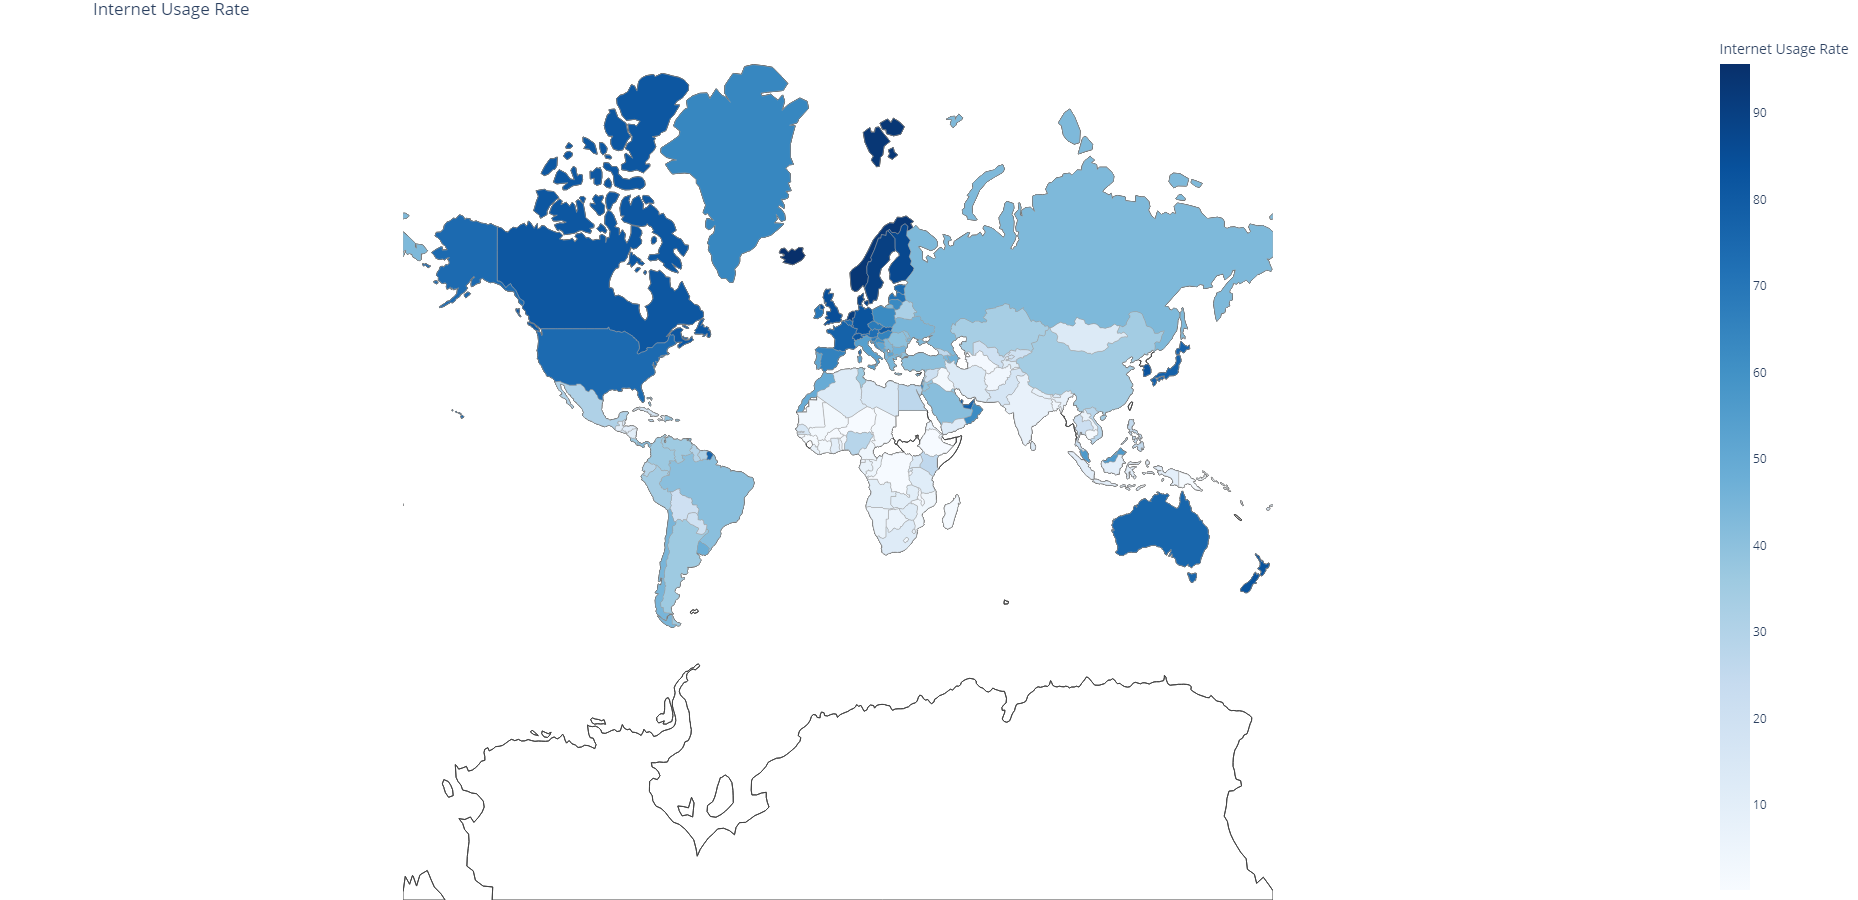

In [8]:
# Define a function to create a choropleth map figure
def create_internet_map(z_data):
    # Initialize an empty Plotly figure
    fig = go.Figure()

    # Rest of the create_map_figure function...

    # Create the second world map for internet usage rate
    fig = create_map_figure(
        z_data=z_data,
        colorscale='Blues',              # Use the 'Blues' colour scale
        title="Internet Usage Rate",     # Set the title of the map
        colorbar_title="Internet Usage Rate" # Set the colour bar title
    )

    return fig

# Create the internet usage rate map
internet_map = create_internet_map(df['internetuserate'])

# Display the internet usage rate map
internet_map.show()


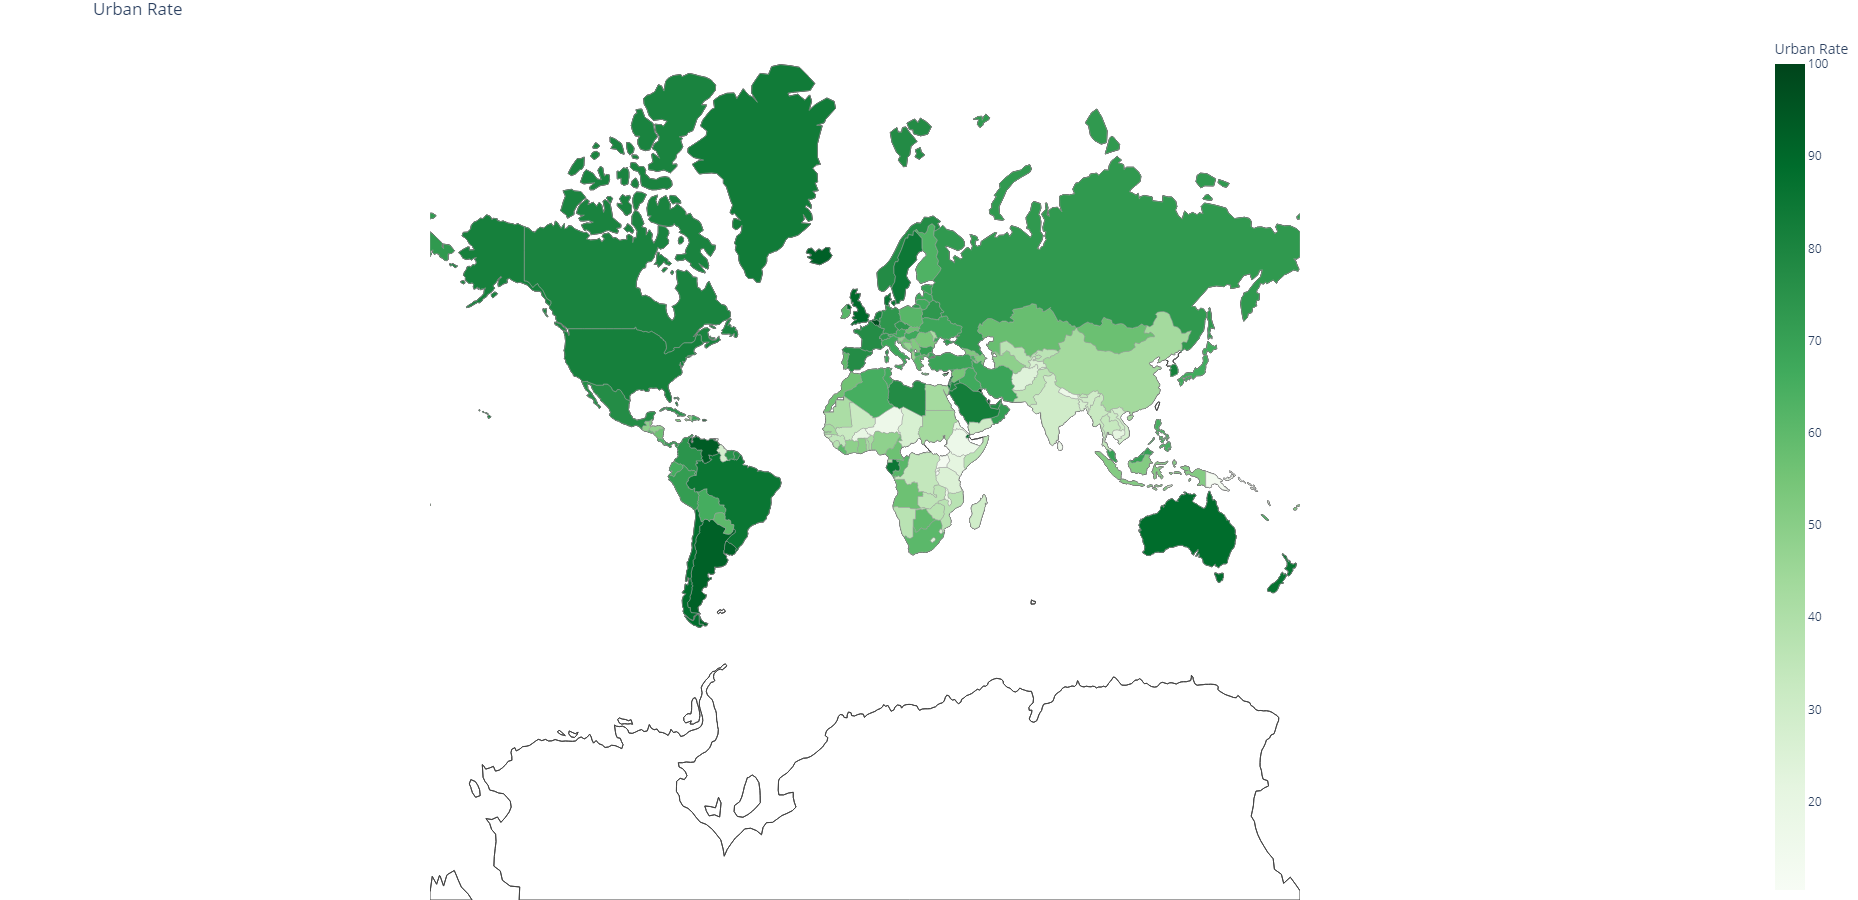

In [9]:
# Define a function to create a choropleth map figure
def create_urban_map(z_data):
    # Initialize an empty Plotly figure
    fig = go.Figure()

    # Rest of the create_map_figure function...

    # Create the third world map for urban rate
    fig = create_map_figure(
        z_data=z_data,
        colorscale='Greens',              # Use the 'Greens' colour scale
        title="Urban Rate",               # Set the title of the map
        colorbar_title="Urban Rate"       # Set the colour bar title
    )

    return fig

# Create the urban rate map
urban_map = create_urban_map(df['urbanrate'])

# Display the urban rate map
urban_map.show()


# First observations
A trend that could already be observed in the year 2000 is that countries with high income per person also had high internet usage rates, primarily concentrated in North America and Europe.
Contributing Factors:
Strong economies enabled substantial investments in cutting-edge technological infrastructure.
Prosperous nations could allocate resources to establish and sustain dependable telecommunications networks.

we can also see high urban rate does not always mean high income 

Uneven wealth distribution and informal settlements can challenge correlations.
Rapid urban growth might not correspond to increased income proportionally.


# Highest and lowest values in each category for each country 

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\4254393055.py:18: UserWarning:

FixedFormatter should only be used together with FixedLocator



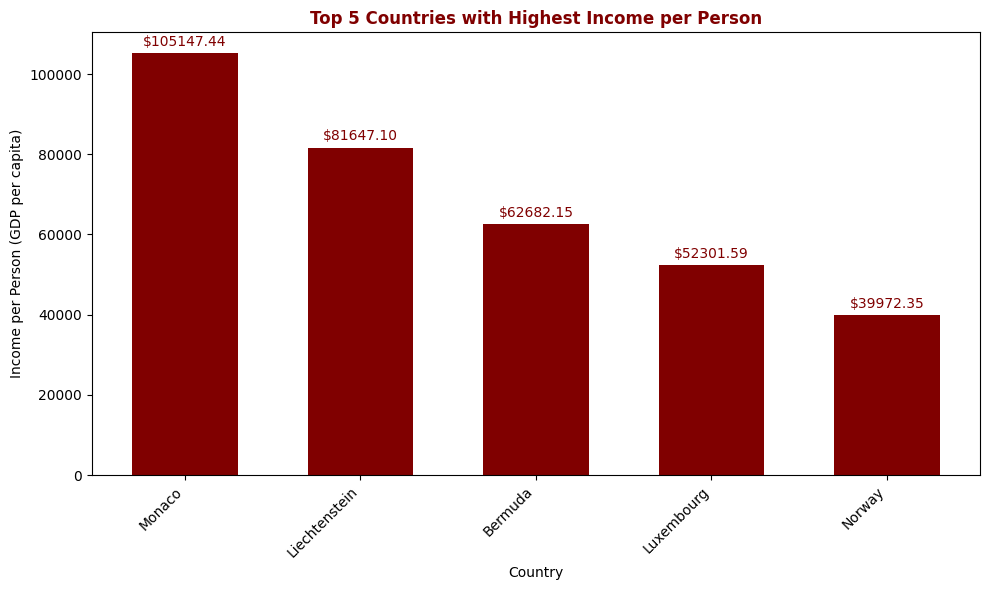

In [10]:
# Read the data from CSV
df = pd.read_csv('gapminder_internet.csv')

# Sort the DataFrame by 'incomeperperson' column in descending order and take the top 5 countries
sorted_df_high_income = df.sort_values(by='incomeperperson', ascending=False).head(5)

# Create a new figure for the first plot
fig, axes = plt.subplots(figsize=(10, 6))  # Only one plot in this figure

# Plot the bar graph for the highest income countries
bars_high_income = axes.bar(sorted_df_high_income['country'], sorted_df_high_income['incomeperperson'],
                            color='#800000', width=0.6)

# Add labels and title to the plot
axes.set_xlabel('Country')
axes.set_ylabel('Income per Person (GDP per capita)')
axes.set_title('Top 5 Countries with Highest Income per Person', fontweight='bold', color='#800000')
axes.set_xticklabels(sorted_df_high_income['country'], rotation=45, ha='right')

# Add dollar sign symbol and value above each bar in the first plot
for bar in bars_high_income:
    height = bar.get_height()
    axes.annotate(f'${height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='#800000')

# Adjust layout and display the first plot
plt.tight_layout()
plt.show()


C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\4099530543.py:15: UserWarning:

FixedFormatter should only be used together with FixedLocator



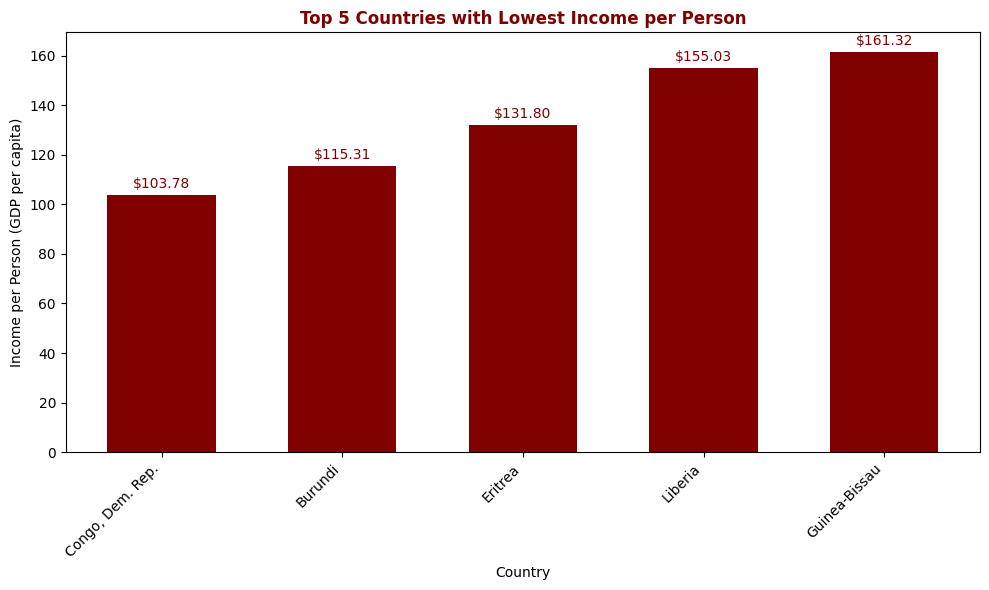

In [11]:
# Sort the DataFrame by 'incomeperperson' column in ascending order and take the top 5 countries
sorted_df_low_income = df.sort_values(by='incomeperperson', ascending=True).head(5)

# Create a new figure for the second plot
fig, axes = plt.subplots(figsize=(10, 6))  # Only one plot in this figure

# Plot the bar graph for the lowest income countries
bars_low_income = axes.bar(sorted_df_low_income['country'], sorted_df_low_income['incomeperperson'],
                           color='#800000', width=0.6)

# Add labels and title to the plot
axes.set_xlabel('Country')
axes.set_ylabel('Income per Person (GDP per capita)')
axes.set_title('Top 5 Countries with Lowest Income per Person', fontweight='bold', color='#800000')
axes.set_xticklabels(sorted_df_low_income['country'], rotation=45, ha='right')

# Add dollar sign symbol and value above each bar in the second plot
for bar in bars_low_income:
    height = bar.get_height()
    axes.annotate(f'${height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='#800000')

# Adjust layout and display the second plot
plt.tight_layout()
plt.show()


C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\181518017.py:18: UserWarning:

FixedFormatter should only be used together with FixedLocator



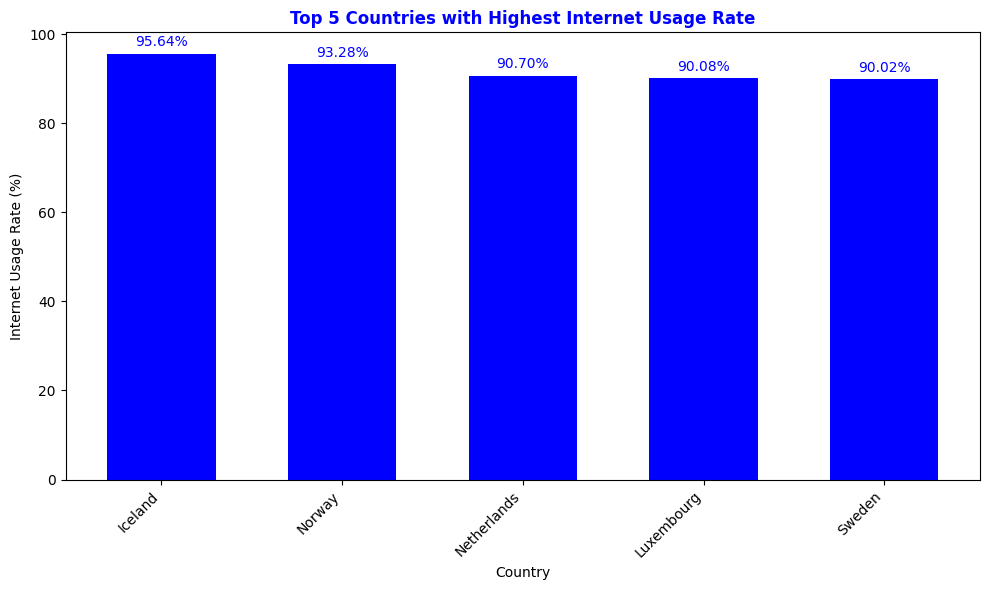

In [12]:
# Read the data from CSV
df = pd.read_csv('gapminder_internet.csv')

# Sort the DataFrame by 'internetuserate' column in descending order and take the top 5 countries
sorted_df_high_internet = df.sort_values(by='internetuserate', ascending=False).head(5)

# Increase the figure size and spacing between bars
fig, axes = plt.subplots(figsize=(10, 6))  # Only one plot in this figure

# Plot the bar graph
bars_high_internet = axes.bar(sorted_df_high_internet['country'], sorted_df_high_internet['internetuserate'],
                              color='blue', width=0.6)

# Add labels and title to the plot
axes.set_xlabel('Country')
axes.set_ylabel('Internet Usage Rate (%)')
axes.set_title('Top 5 Countries with Highest Internet Usage Rate', fontweight='bold', color='blue')
axes.set_xticklabels(sorted_df_high_internet['country'], rotation=45, ha='right')

# Add percentage sign symbol and value above each bar
for bar in bars_high_internet:
    height = bar.get_height()
    axes.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='blue')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\1114707806.py:15: UserWarning:

FixedFormatter should only be used together with FixedLocator



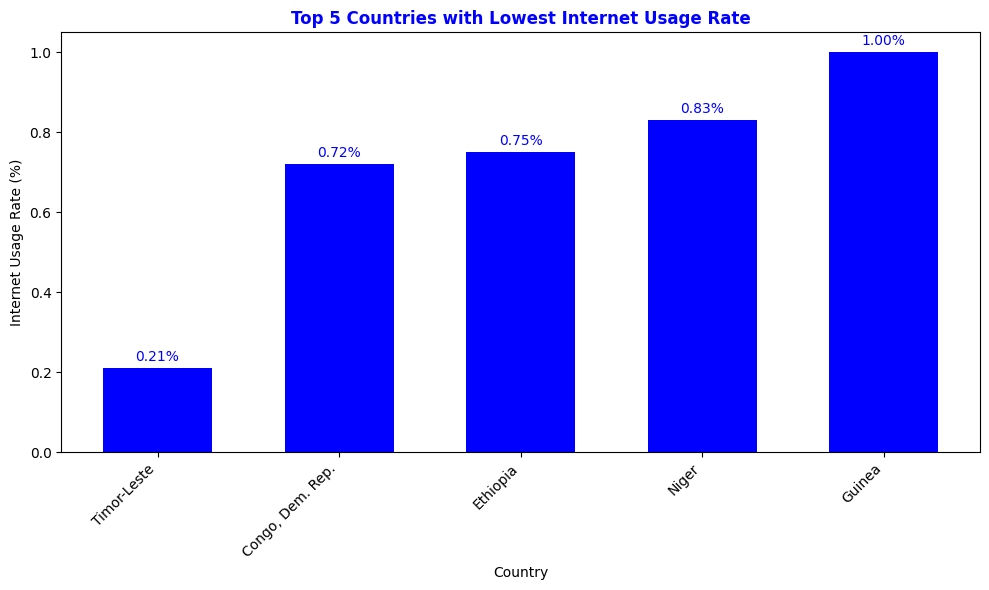

In [13]:
# Sort the DataFrame by 'internetuserate' column in ascending order and take the top 5 countries
sorted_df_low_internet = df.sort_values(by='internetuserate', ascending=True).head(5)

# Create a new figure for the second plot
fig, axes = plt.subplots(figsize=(10, 6))  # Only one plot in this figure

# Plot the bar graph
bars_low_internet = axes.bar(sorted_df_low_internet['country'], sorted_df_low_internet['internetuserate'],
                             color='blue', width=0.6)

# Add labels and title to the plot
axes.set_xlabel('Country')
axes.set_ylabel('Internet Usage Rate (%)')
axes.set_title('Top 5 Countries with Lowest Internet Usage Rate', fontweight='bold', color='blue')
axes.set_xticklabels(sorted_df_low_internet['country'], rotation=45, ha='right')

# Add percentage sign symbol and value above each bar
for bar in bars_low_internet:
    height = bar.get_height()
    axes.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='blue')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


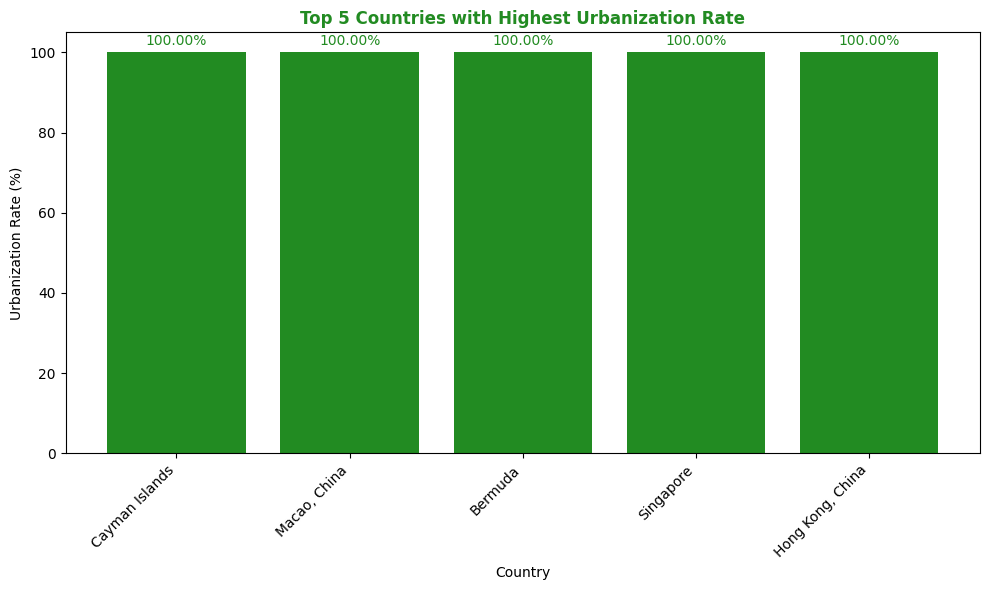

In [14]:

# Read the data from CSV
df = pd.read_csv('gapminder_internet.csv')

# Sort the DataFrame by 'urbanrate' column in descending order and take the top 5 countries
sorted_df_high_urban = df.sort_values(by='urbanrate', ascending=False).head(5)

# Plotting the Top 5 Countries with Highest Urbanization Rate
plt.figure(figsize=(10, 6))

bars_high_urban = plt.bar(sorted_df_high_urban['country'], sorted_df_high_urban['urbanrate'], color='#228B22')

plt.xlabel('Country')
plt.ylabel('Urbanization Rate (%)')
plt.title('Top 5 Countries with Highest Urbanization Rate', fontweight='bold', color='#228B22')
plt.xticks(rotation=45, ha='right')

for bar in bars_high_urban:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords="offset points", ha='center', va='bottom', color='#228B22')

plt.tight_layout()
plt.show()


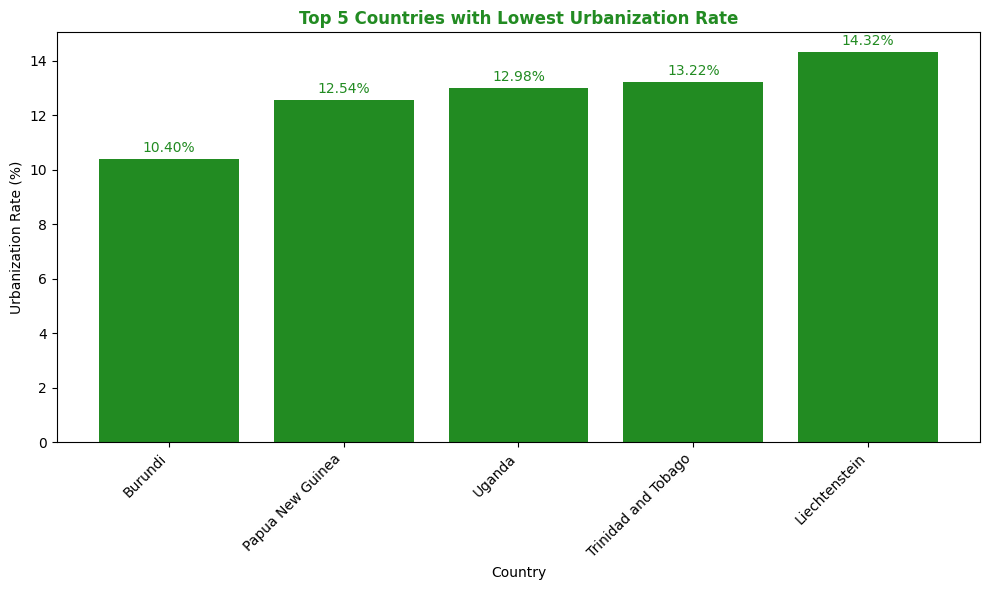

In [15]:
# Sort the DataFrame by 'urbanrate' column in ascending order and take the top 5 countries
sorted_df_low_urban = df.sort_values(by='urbanrate', ascending=True).head(5)

# Plotting the Top 5 Countries with Lowest Urbanization Rate
plt.figure(figsize=(10, 6))

bars_low_urban = plt.bar(sorted_df_low_urban['country'], sorted_df_low_urban['urbanrate'], color='#228B22')

plt.xlabel('Country')
plt.ylabel('Urbanization Rate (%)')
plt.title('Top 5 Countries with Lowest Urbanization Rate', fontweight='bold', color='#228B22')
plt.xticks(rotation=45, ha='right')

for bar in bars_low_urban:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords="offset points", ha='center', va='bottom', color='#228B22')

plt.tight_layout()
plt.show()


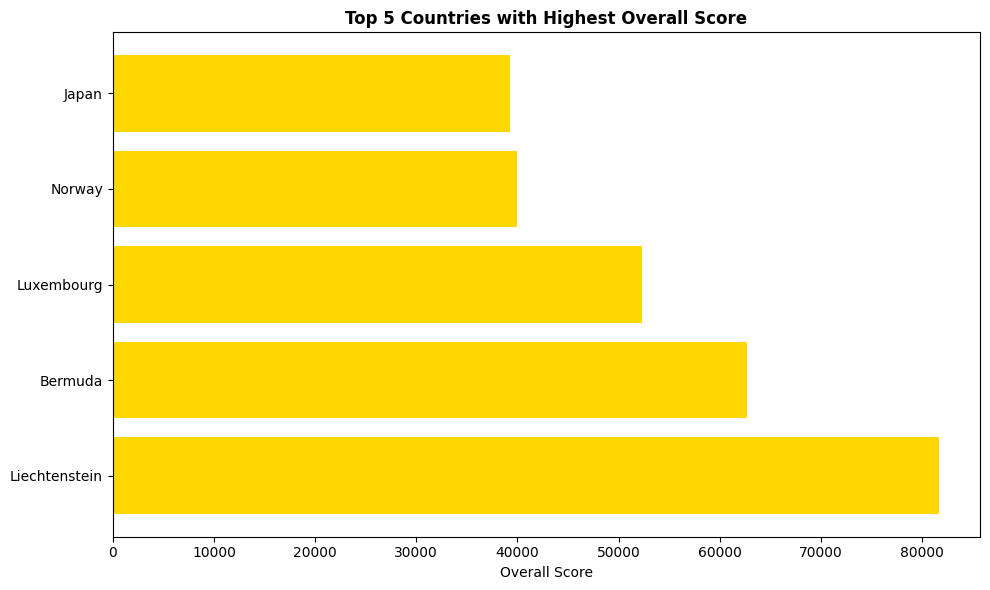

In [16]:
# Read the data from CSV
df = pd.read_csv('gapminder_internet.csv')

# Drop rows with missing data in specified columns
cols_to_check = ['incomeperperson', 'internetuserate', 'urbanrate']
df = df.dropna(subset=cols_to_check)

# Calculate the overall score for each country
df['Overall_Score'] = df[cols_to_check].max(axis=1)

# Sort the DataFrame by 'Overall_Score' column in descending order and take the top 5 countries
sorted_df_high_score = df.sort_values(by='Overall_Score', ascending=False).head(5)

# Plotting the Top 5 Countries with Highest Overall Score
plt.figure(figsize=(10, 6))

bars_high_score = plt.barh(sorted_df_high_score['country'], sorted_df_high_score['Overall_Score'], color='#FFD700')

plt.xlabel('Overall Score')
plt.title('Top 5 Countries with Highest Overall Score', fontweight='bold', color='black')

plt.tight_layout()
plt.show()


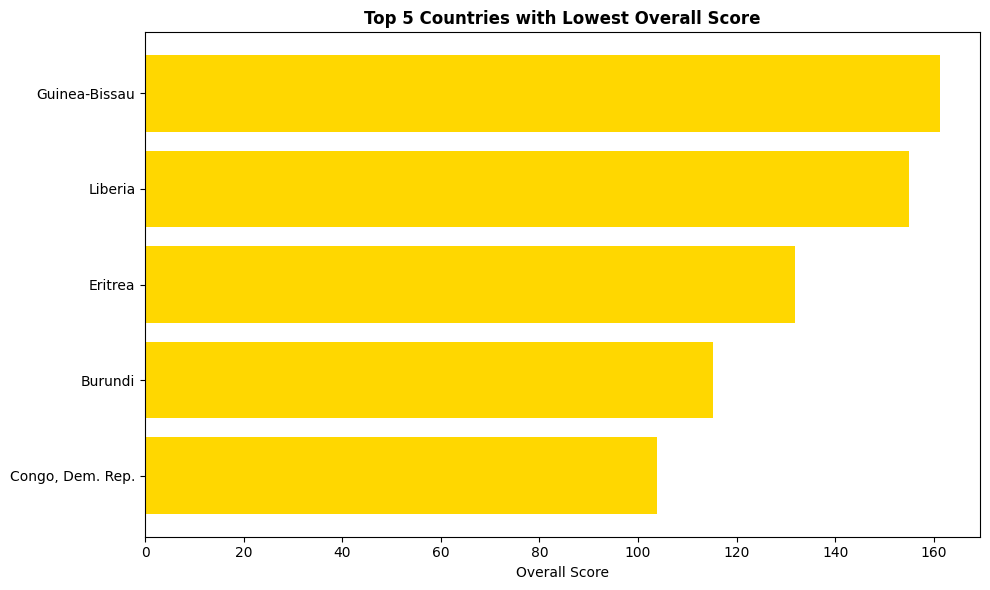

In [17]:
# Sort the DataFrame by 'Overall_Score' column in ascending order and take the top 5 countries
sorted_df_low_score = df.sort_values(by='Overall_Score', ascending=True).head(5)

# Plotting the Top 5 Countries with Lowest Overall Score
plt.figure(figsize=(10, 6))

bars_low_score = plt.barh(sorted_df_low_score['country'], sorted_df_low_score['Overall_Score'], color='#FFD700')

plt.xlabel('Overall Score')
plt.title('Top 5 Countries with Lowest Overall Score', fontweight='bold', color='black')

plt.tight_layout()
plt.show()


# Overall trends

European Prosperity & Internet Usage
European countries boasted high income levels in 2000.
Strong economies and social welfare systems contributed to prosperity.
High rates of internet usage due to advanced infrastructure.

Oceania & Asia: Urbanization and Development
Oceania and Asian regions experienced the start of rapid urbanization.
Factors like population growth and industrialization drove development.
Focus on infrastructure, industries, and economic modernization.

African Challenges & Development
Underdeveloped African countries faced multiple challenges.
Widespread poverty, healthcare and education gaps, and political instability.
Lower scores in indicators like income, health, and education.

# Average distribution of values by continent

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\2464648112.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\2464648112.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\2464648112.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

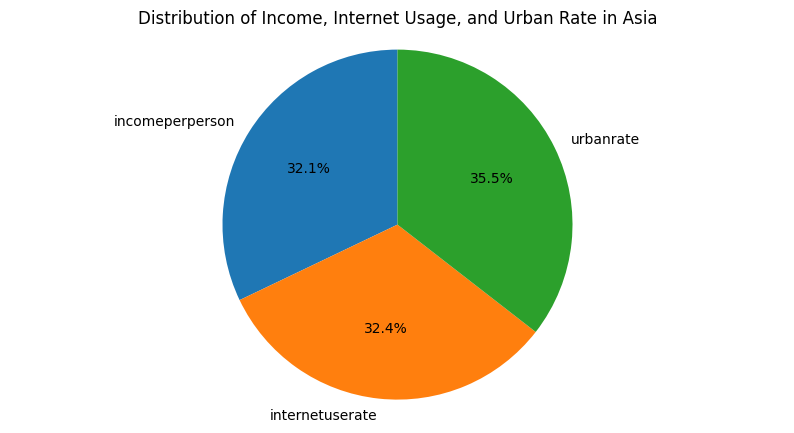

In [18]:
# Read the data from the CSV file into a pandas DataFrame
data = pd.read_csv('gapminder_internet.csv')

# Define the function to normalize a column
def normalize_column(col, avg_val):
    return col / avg_val

# Calculate overall averages for normalization
overall_avg_income = data['incomeperperson'].mean()
overall_avg_internet = data['internetuserate'].mean()
overall_avg_urban = data['urbanrate'].mean()

# Filter data for the 'Asia' continent
asia_data = data[data['continent'] == 'Asia']

# Normalize the data for 'Asia' using the defined normalization function
asia_data['incomeperperson'] = normalize_column(asia_data['incomeperperson'], overall_avg_income)
asia_data['internetuserate'] = normalize_column(asia_data['internetuserate'], overall_avg_internet)
asia_data['urbanrate'] = normalize_column(asia_data['urbanrate'], overall_avg_urban)

# Define the variables for which we want to compute mean values
variables = ['incomeperperson', 'internetuserate', 'urbanrate']

# Compute mean values for the normalized variables in 'Asia'
asia_mean_values = asia_data[variables].mean()

# Create the pie chart for 'Asia'
fig, ax = plt.subplots()
ax.pie(asia_mean_values, labels=variables, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Set the title for the pie chart
ax.set_title("Distribution of Income, Internet Usage, and Urban Rate in Asia")

# Display the pie chart
plt.show()


C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\2333048908.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\2333048908.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\2333048908.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

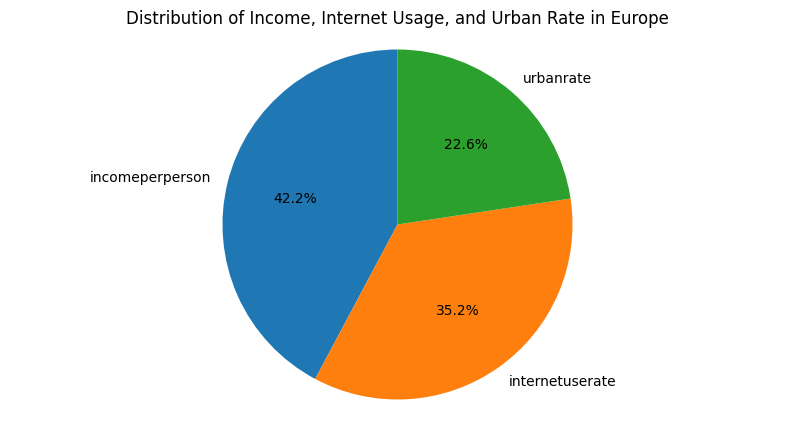

In [19]:
# Filter data for Europe
europe_data = data[data['continent'] == 'Europe']

# Normalize the data for Europe
europe_data['incomeperperson'] = normalize_column(europe_data['incomeperperson'], overall_avg_income)
europe_data['internetuserate'] = normalize_column(europe_data['internetuserate'], overall_avg_internet)
europe_data['urbanrate'] = normalize_column(europe_data['urbanrate'], overall_avg_urban)

# Compute mean values for Europe
europe_mean_values = europe_data[variables].mean()

# Create the pie chart for Europe
fig, ax = plt.subplots()
ax.pie(europe_mean_values, labels=variables, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title("Distribution of Income, Internet Usage, and Urban Rate in Europe")
plt.show()


C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\1283620628.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\1283620628.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\1283620628.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

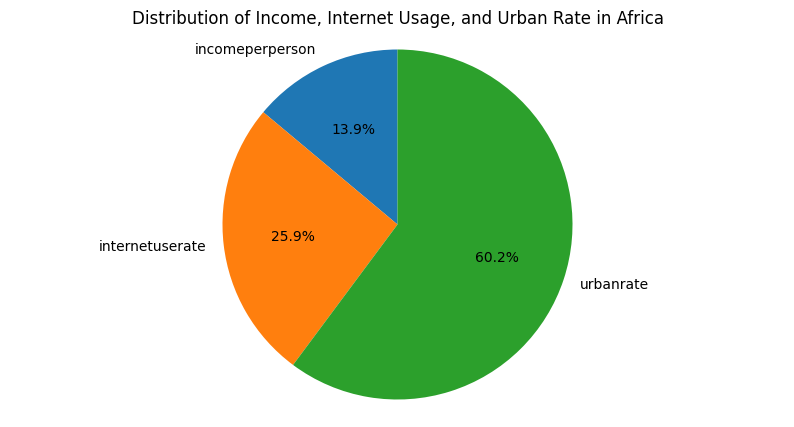

In [20]:
# ... (import statements and data reading)

# Filter data for Africa
europe_data = data[data['continent'] == 'Africa']

# Normalize the data for Africa
europe_data['incomeperperson'] = normalize_column(europe_data['incomeperperson'], overall_avg_income)
europe_data['internetuserate'] = normalize_column(europe_data['internetuserate'], overall_avg_internet)
europe_data['urbanrate'] = normalize_column(europe_data['urbanrate'], overall_avg_urban)

# Compute mean values for Africa
europe_mean_values = europe_data[variables].mean()

# Create the pie chart for Africa
fig, ax = plt.subplots()
ax.pie(europe_mean_values, labels=variables, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title("Distribution of Income, Internet Usage, and Urban Rate in Africa")
plt.show()


C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\3869701078.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\3869701078.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\3869701078.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

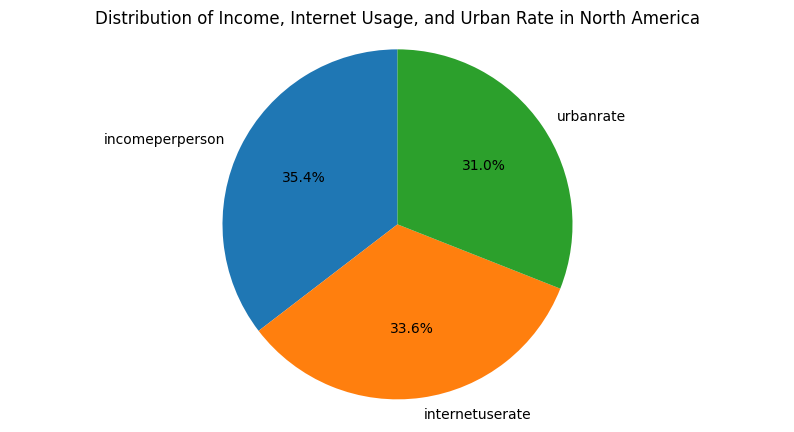

In [21]:
# Filter data for North America
north_america_data = data[data['continent'] == 'North America']

# Normalize the data for North America
north_america_data['incomeperperson'] = normalize_column(north_america_data['incomeperperson'], overall_avg_income)
north_america_data['internetuserate'] = normalize_column(north_america_data['internetuserate'], overall_avg_internet)
north_america_data['urbanrate'] = normalize_column(north_america_data['urbanrate'], overall_avg_urban)

# Compute mean values for North America
north_america_mean_values = north_america_data[variables].mean()

# Create the pie chart for North America
fig, ax = plt.subplots()
ax.pie(north_america_mean_values, labels=variables, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title("Distribution of Income, Internet Usage, and Urban Rate in North America")
plt.show()


C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\2074026355.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\2074026355.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\2074026355.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

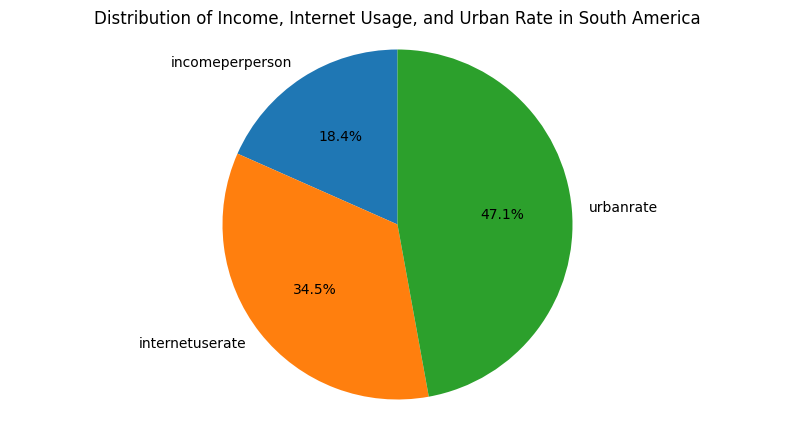

In [22]:
# Filter data for South America
south_america_data = data[data['continent'] == 'South America']

# Normalize the data for South America
south_america_data['incomeperperson'] = normalize_column(south_america_data['incomeperperson'], overall_avg_income)
south_america_data['internetuserate'] = normalize_column(south_america_data['internetuserate'], overall_avg_internet)
south_america_data['urbanrate'] = normalize_column(south_america_data['urbanrate'], overall_avg_urban)

# Compute mean values for South America
south_america_mean_values = south_america_data[variables].mean()

# Create the pie chart for South America
fig, ax = plt.subplots()
ax.pie(south_america_mean_values, labels=variables, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title("Distribution of Income, Internet Usage, and Urban Rate in South America")
plt.show()


C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\891605182.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\891605182.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\891605182.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

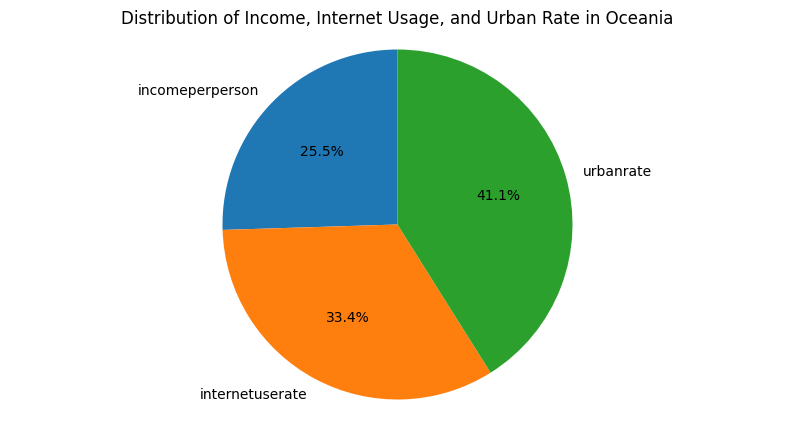

In [23]:
# Filter data for Oceania
oceania_data = data[data['continent'] == 'Oceania']

# Normalize the data for Oceania
oceania_data['incomeperperson'] = normalize_column(oceania_data['incomeperperson'], overall_avg_income)
oceania_data['internetuserate'] = normalize_column(oceania_data['internetuserate'], overall_avg_internet)
oceania_data['urbanrate'] = normalize_column(oceania_data['urbanrate'], overall_avg_urban)

# Compute mean values for Oceania
oceania_mean_values = oceania_data[variables].mean()

# Create the pie chart for Oceania
fig, ax = plt.subplots()
ax.pie(oceania_mean_values, labels=variables, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title("Distribution of Income, Internet Usage, and Urban Rate in Oceania")
plt.show()


C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\115888529.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\115888529.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\115888529.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

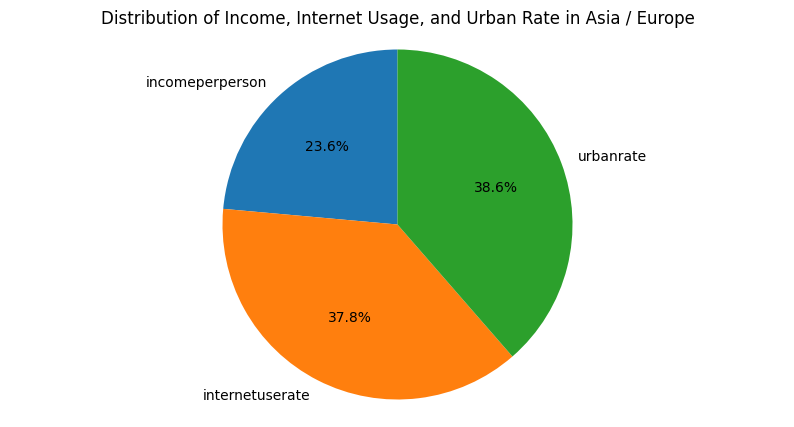

In [24]:
# Filter data for Asia / Europe
asia_europe_data = data[data['continent'] == 'Asia / Europe']

# Normalize the data for Asia / Europe
asia_europe_data['incomeperperson'] = normalize_column(asia_europe_data['incomeperperson'], overall_avg_income)
asia_europe_data['internetuserate'] = normalize_column(asia_europe_data['internetuserate'], overall_avg_internet)
asia_europe_data['urbanrate'] = normalize_column(asia_europe_data['urbanrate'], overall_avg_urban)

# Compute mean values for Asia / Europe
asia_europe_mean_values = asia_europe_data[variables].mean()

# Create the pie chart for Asia / Europe
fig, ax = plt.subplots()
ax.pie(asia_europe_mean_values, labels=variables, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title("Distribution of Income, Internet Usage, and Urban Rate in Asia / Europe")
plt.show()


# Year 2020 

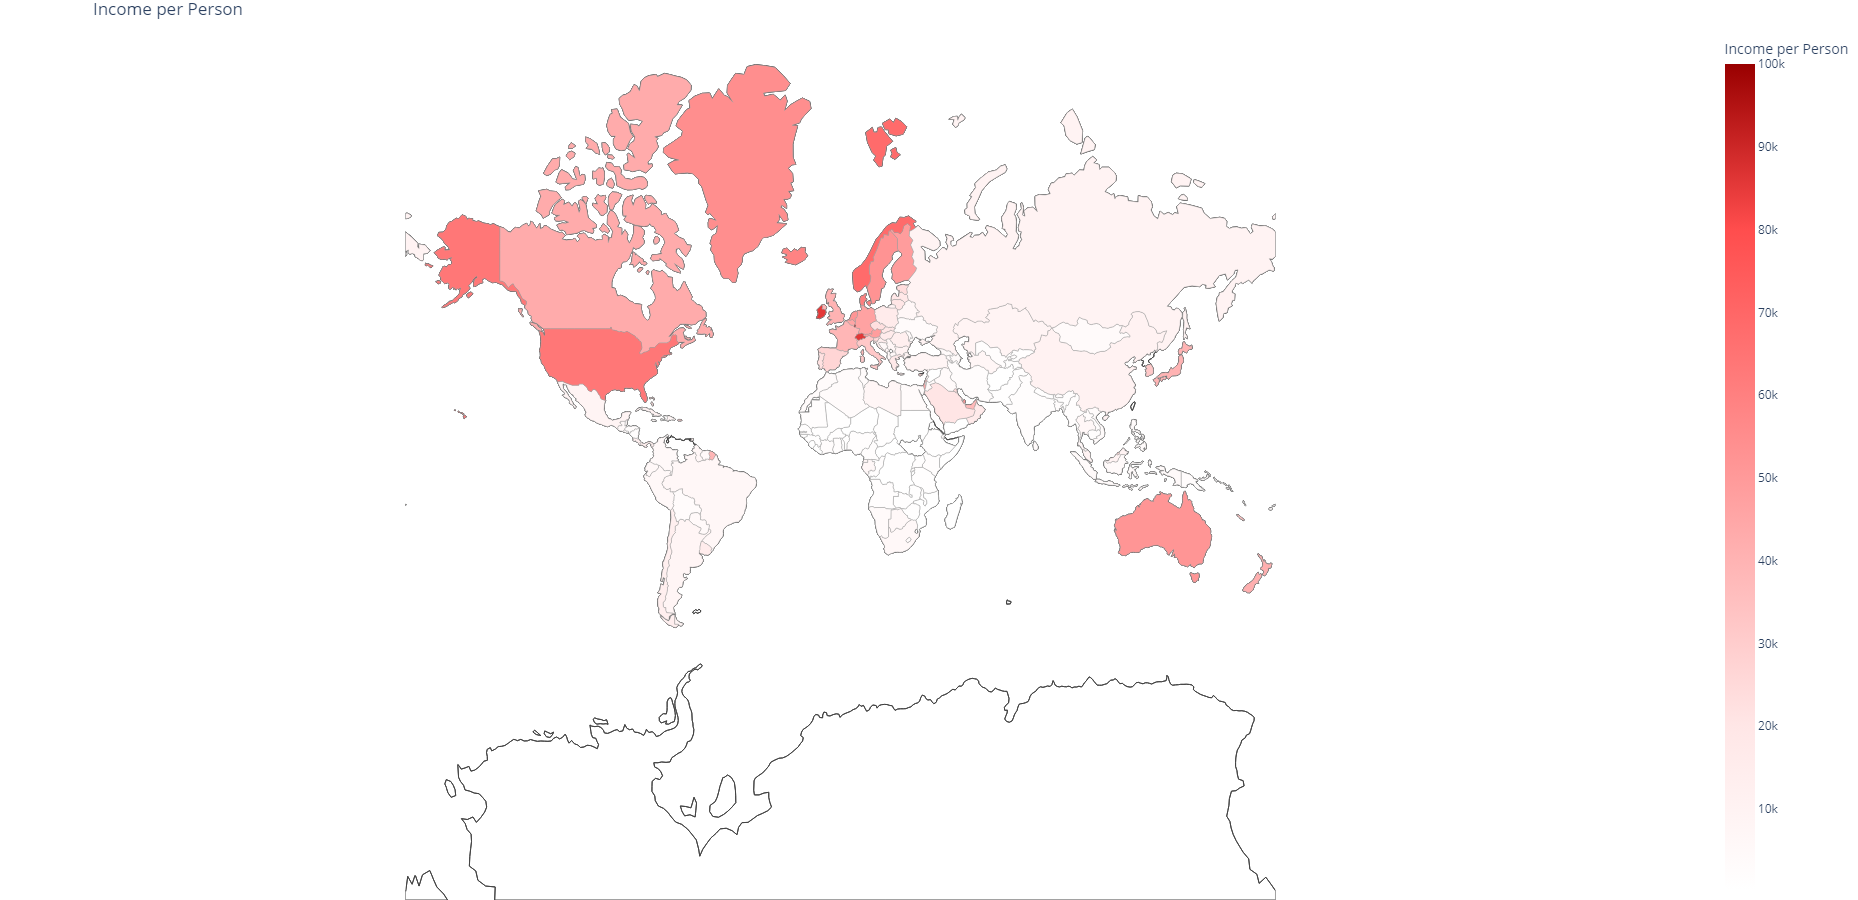

In [25]:
df = pd.read_csv('2020dataset.csv')

# Define a function to create a choropleth map figure
def create_map_figure(z_data, colorscale, title, colorbar_title, reversescale=False):
    # Initialize an empty Plotly figure
    fig = go.Figure()

    # Create a Choropleth trace for the map
    trace = go.Choropleth(
        locations=df['country'],              # List of country names for map locations
        locationmode='country names',           # Specify location mode as country names
        z=z_data,                               # Data values for colouring the map
        text=df['country'],                   # Text to display on hover over map
        hovertemplate="<b>%{text}</b><br><br>" + title + ": %{z:,.2f}<extra></extra>",  # Hover template for tooltip
        colorscale=colorscale,                  # Colour scale for mapping values to colours
        reversescale=reversescale,              # Reverse the colour scale if True (for income data)
        colorbar=dict(title=colorbar_title),    # Title for the colour bar
        marker_line_color='darkgray',           # Colour of the border lines for map markers
        marker_line_width=0.5                   # Width of the border lines for map markers
    )

    # Add the Choropleth trace to the figure
    fig.add_trace(trace)

    # Update geographical layout settings
    fig.update_geos(
        visible=False,                          # Set map visibility to False initially
        showcountries=True,                     # Show country boundaries
        showcoastlines=True,                    # Show coastlines
        projection_type="mercator"              # Use Mercator projection for the map
    )

    # Update overall layout settings
    fig.update_layout(
        title=title,                            # Set the title of the map
        geo=dict(
            showframe=False,                     # Hide map frame
            showcoastlines=True,                 # Show coastlines
            projection_type="mercator"           # Use Mercator projection for the map
        ),
        margin=dict(l=0, r=0, t=30, b=0),         # Adjust margins for the map
        width=1200,                              # Set the width of the map box
        height=900                              # Set the height of the map box
    )

    return fig

# Define a custom colour scale for income per person
red_scale = [
    [0.0, 'rgb(255, 255, 255)'],                # White for the lowest values
    [0.2, 'rgb(255, 230, 230)'],
    [0.4, 'rgb(255, 179, 179)'],
    [0.6, 'rgb(255, 128, 128)'],
    [0.8, 'rgb(255, 77, 77)'],
    [1.0, 'rgb(153, 0, 0)']                     # Dark red for the highest values
]

# Create the world map for income per person with the custom colour scale
fig = create_map_figure(
    z_data=df['incomeperperson'].clip(upper=100000),   # Clip income values to 100000 for better visualisation
    colorscale=red_scale,                               # Use the custom colour scale
    title="Income per Person",                          # Set the title of the map
    colorbar_title="Income per Person"                  # Set the colour bar title
)

# Display the map
fig.show()


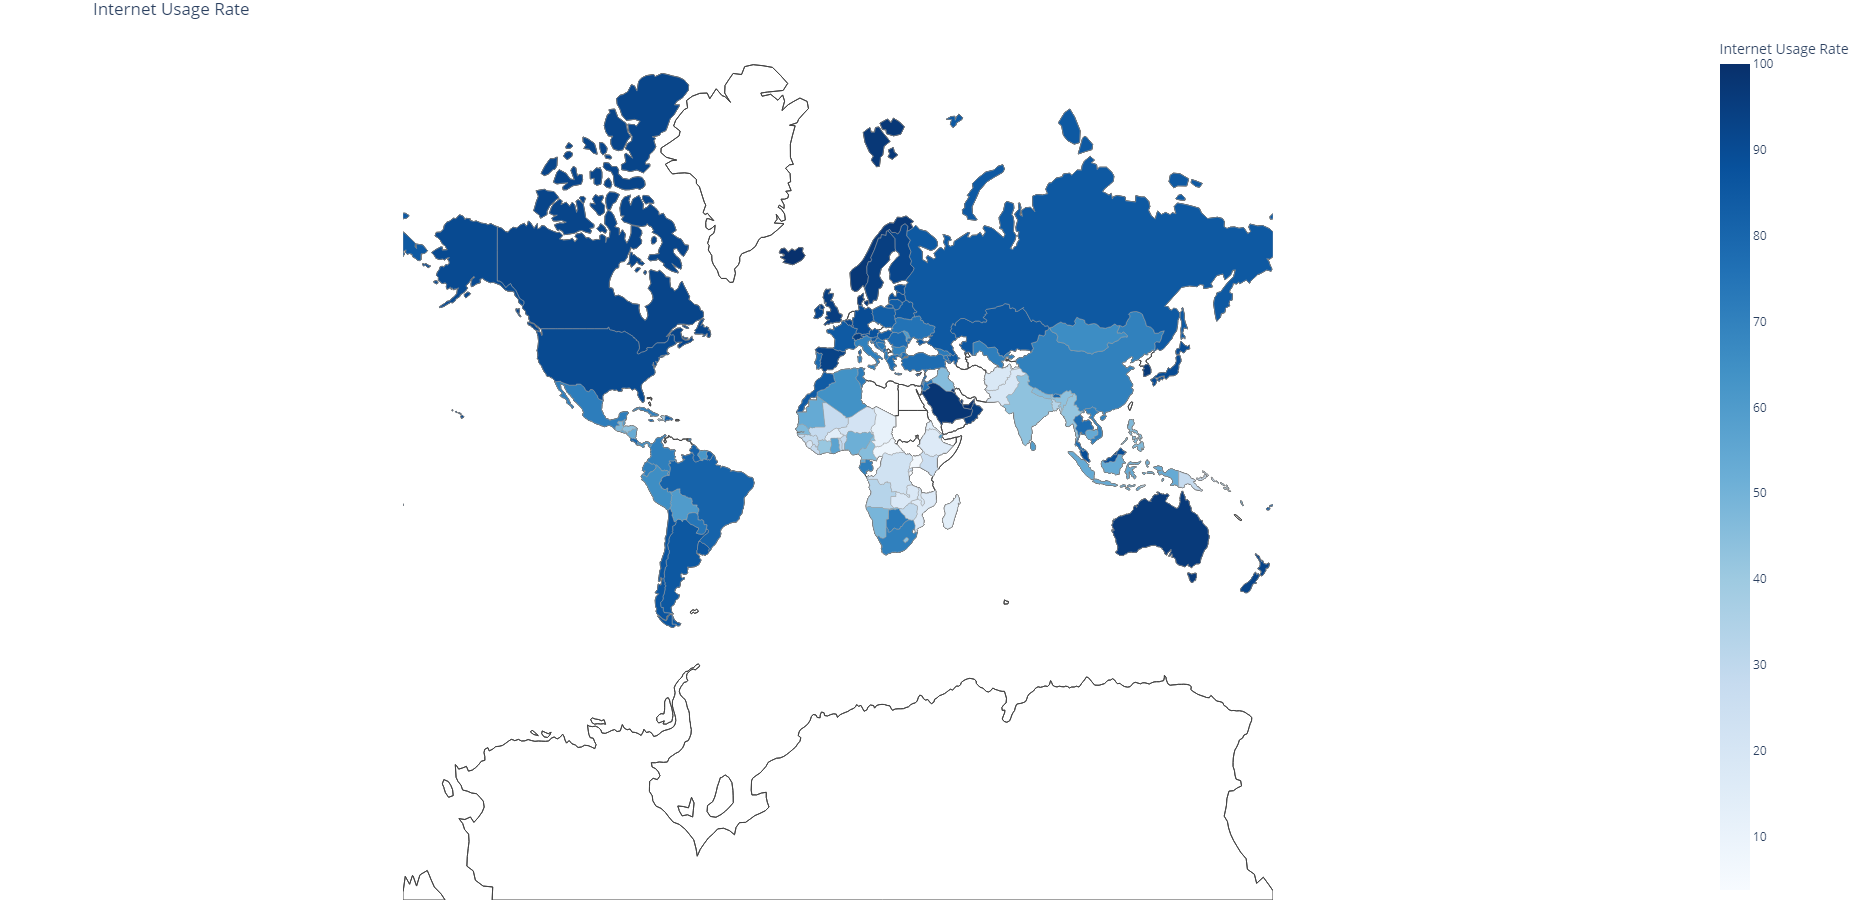

In [26]:
# Define a function to create a choropleth map figure
def create_internet_map(z_data):
    # Initialize an empty Plotly figure
    fig = go.Figure()

    # Rest of the create_map_figure function...

    # Create the second world map for internet usage rate
    fig = create_map_figure(
        z_data=z_data,
        colorscale='Blues',              # Use the 'Blues' colour scale
        title="Internet Usage Rate",     # Set the title of the map
        colorbar_title="Internet Usage Rate" # Set the colour bar title
    )

    return fig

# Create the internet usage rate map
internet_map = create_internet_map(df['internetuserate'])

# Display the internet usage rate map
internet_map.show()


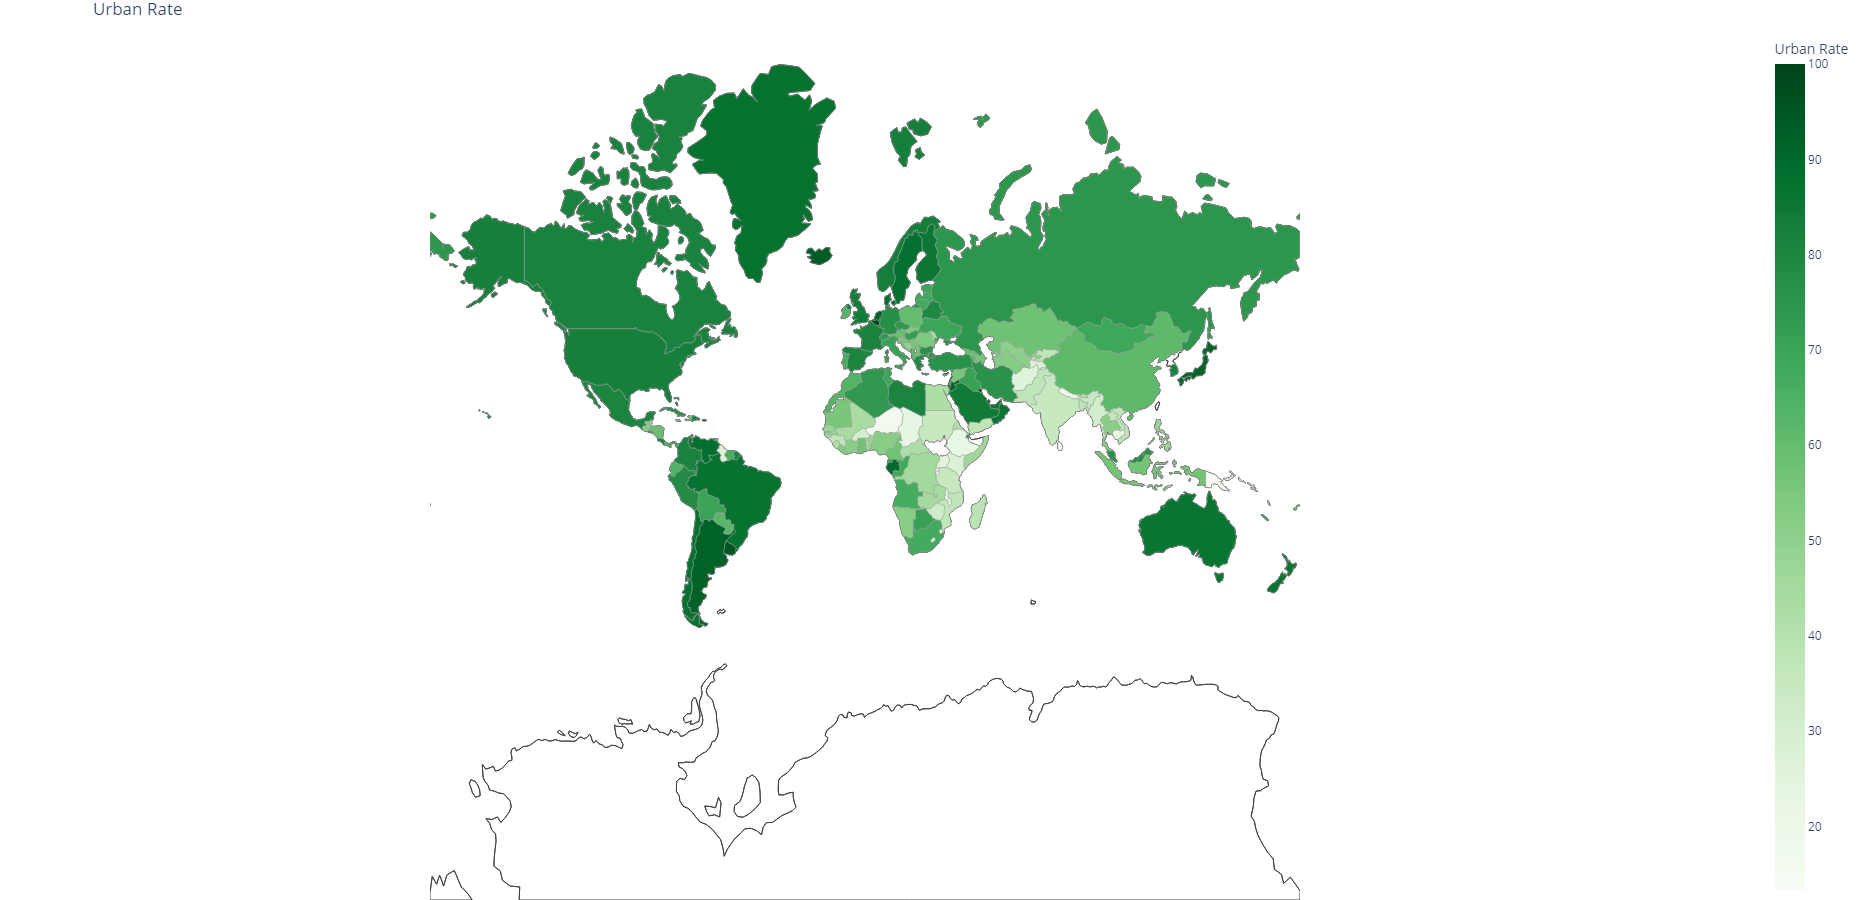

In [27]:
# Define a function to create a choropleth map figure
def create_urban_map(z_data):
    # Initialize an empty Plotly figure
    fig = go.Figure()

    # Rest of the create_map_figure function...

    # Create the third world map for urban rate
    fig = create_map_figure(
        z_data=z_data,
        colorscale='Greens',              # Use the 'Greens' colour scale
        title="Urban Rate",               # Set the title of the map
        colorbar_title="Urban Rate"       # Set the colour bar title
    )

    return fig

# Create the urban rate map
urban_map = create_urban_map(df['urbanrate'])

# Display the urban rate map
urban_map.show()


# First observations

Between 2000 and 2020, global income increased. Yet, this primarily favored high-income countries due to uneven economic policies, 
trade, and investment.

Internet access also expanded globally, driven by technological advances and decreasing costs. 

Moreover, South America, Oceania, and Asia experienced notable urbanization, influenced by industrialization, job prospects, and better urban living conditions.

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\2536051897.py:18: UserWarning:

FixedFormatter should only be used together with FixedLocator



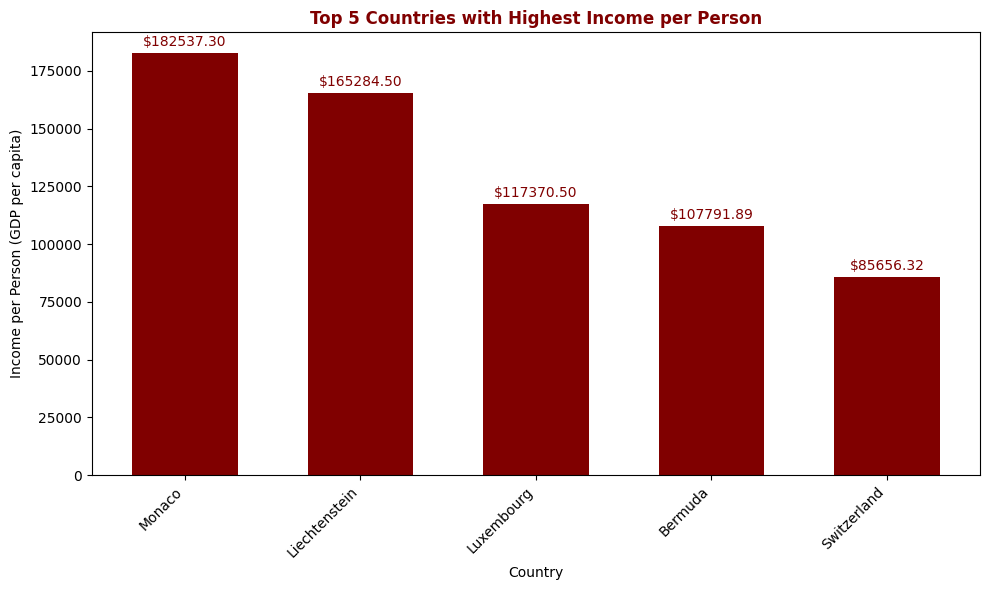

In [28]:
# Read the data from CSV
df = pd.read_csv('2020dataset.csv')

# Sort the DataFrame by 'incomeperperson' column in descending order and take the top 5 countries
sorted_df_high_income = df.sort_values(by='incomeperperson', ascending=False).head(5)

# Create a new figure for the first plot
fig, axes = plt.subplots(figsize=(10, 6))  # Only one plot in this figure

# Plot the bar graph for the highest income countries
bars_high_income = axes.bar(sorted_df_high_income['country'], sorted_df_high_income['incomeperperson'],
                            color='#800000', width=0.6)

# Add labels and title to the plot
axes.set_xlabel('Country')
axes.set_ylabel('Income per Person (GDP per capita)')
axes.set_title('Top 5 Countries with Highest Income per Person', fontweight='bold', color='#800000')
axes.set_xticklabels(sorted_df_high_income['country'], rotation=45, ha='right')

# Add dollar sign symbol and value above each bar in the first plot
for bar in bars_high_income:
    height = bar.get_height()
    axes.annotate(f'${height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='#800000')

# Adjust layout and display the first plot
plt.tight_layout()
plt.show()


C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\4099530543.py:15: UserWarning:

FixedFormatter should only be used together with FixedLocator



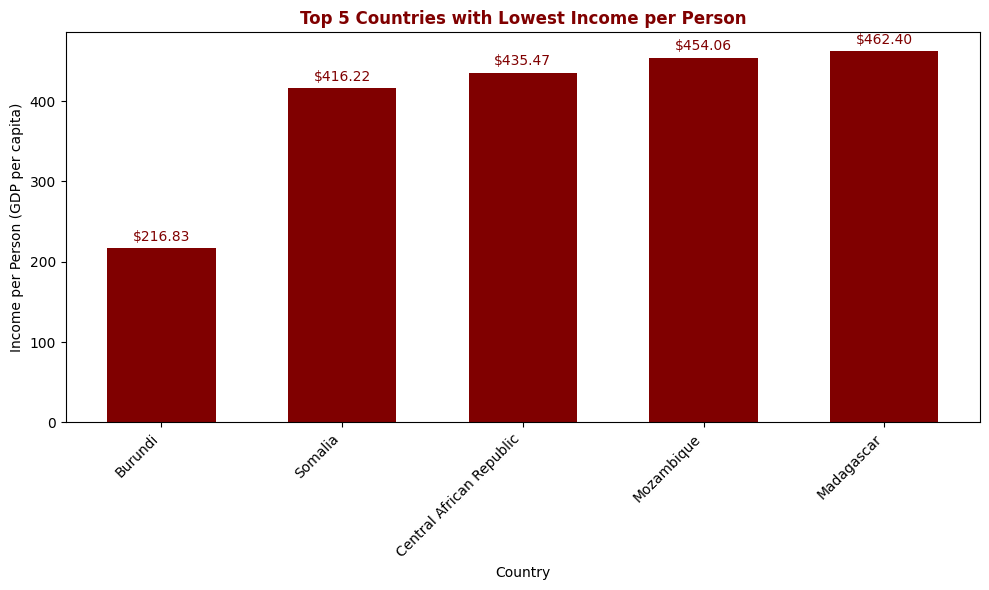

In [29]:
# Sort the DataFrame by 'incomeperperson' column in ascending order and take the top 5 countries
sorted_df_low_income = df.sort_values(by='incomeperperson', ascending=True).head(5)

# Create a new figure for the second plot
fig, axes = plt.subplots(figsize=(10, 6))  # Only one plot in this figure

# Plot the bar graph for the lowest income countries
bars_low_income = axes.bar(sorted_df_low_income['country'], sorted_df_low_income['incomeperperson'],
                           color='#800000', width=0.6)

# Add labels and title to the plot
axes.set_xlabel('Country')
axes.set_ylabel('Income per Person (GDP per capita)')
axes.set_title('Top 5 Countries with Lowest Income per Person', fontweight='bold', color='#800000')
axes.set_xticklabels(sorted_df_low_income['country'], rotation=45, ha='right')

# Add dollar sign symbol and value above each bar in the second plot
for bar in bars_low_income:
    height = bar.get_height()
    axes.annotate(f'${height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='#800000')

# Adjust layout and display the second plot
plt.tight_layout()
plt.show()


C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\2863814774.py:18: UserWarning:

FixedFormatter should only be used together with FixedLocator



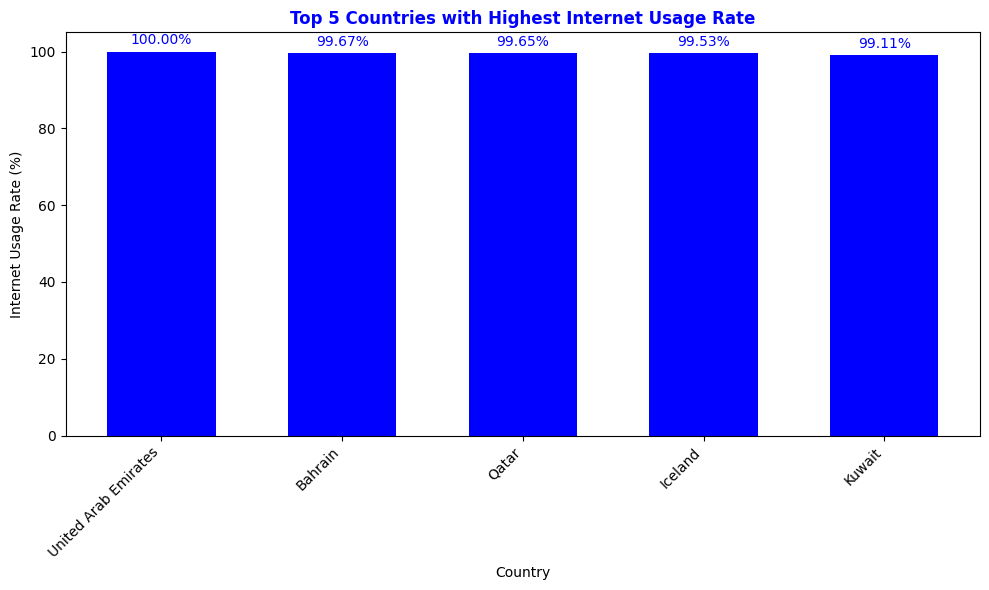

In [30]:
# Read the data from CSV
df = pd.read_csv('2020dataset.csv')

# Sort the DataFrame by 'internetuserate' column in descending order and take the top 5 countries
sorted_df_high_internet = df.sort_values(by='internetuserate', ascending=False).head(5)

# Increase the figure size and spacing between bars
fig, axes = plt.subplots(figsize=(10, 6))  # Only one plot in this figure

# Plot the bar graph
bars_high_internet = axes.bar(sorted_df_high_internet['country'], sorted_df_high_internet['internetuserate'],
                              color='blue', width=0.6)

# Add labels and title to the plot
axes.set_xlabel('Country')
axes.set_ylabel('Internet Usage Rate (%)')
axes.set_title('Top 5 Countries with Highest Internet Usage Rate', fontweight='bold', color='blue')
axes.set_xticklabels(sorted_df_high_internet['country'], rotation=45, ha='right')

# Add percentage sign symbol and value above each bar
for bar in bars_high_internet:
    height = bar.get_height()
    axes.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='blue')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\1114707806.py:15: UserWarning:

FixedFormatter should only be used together with FixedLocator



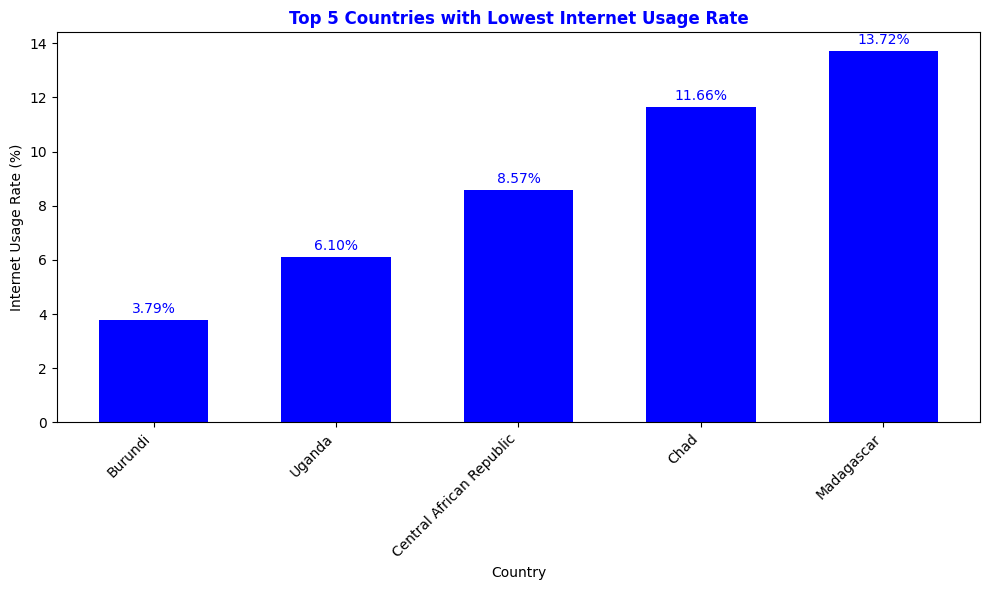

In [31]:
# Sort the DataFrame by 'internetuserate' column in ascending order and take the top 5 countries
sorted_df_low_internet = df.sort_values(by='internetuserate', ascending=True).head(5)

# Create a new figure for the second plot
fig, axes = plt.subplots(figsize=(10, 6))  # Only one plot in this figure

# Plot the bar graph
bars_low_internet = axes.bar(sorted_df_low_internet['country'], sorted_df_low_internet['internetuserate'],
                             color='blue', width=0.6)

# Add labels and title to the plot
axes.set_xlabel('Country')
axes.set_ylabel('Internet Usage Rate (%)')
axes.set_title('Top 5 Countries with Lowest Internet Usage Rate', fontweight='bold', color='blue')
axes.set_xticklabels(sorted_df_low_internet['country'], rotation=45, ha='right')

# Add percentage sign symbol and value above each bar
for bar in bars_low_internet:
    height = bar.get_height()
    axes.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='blue')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


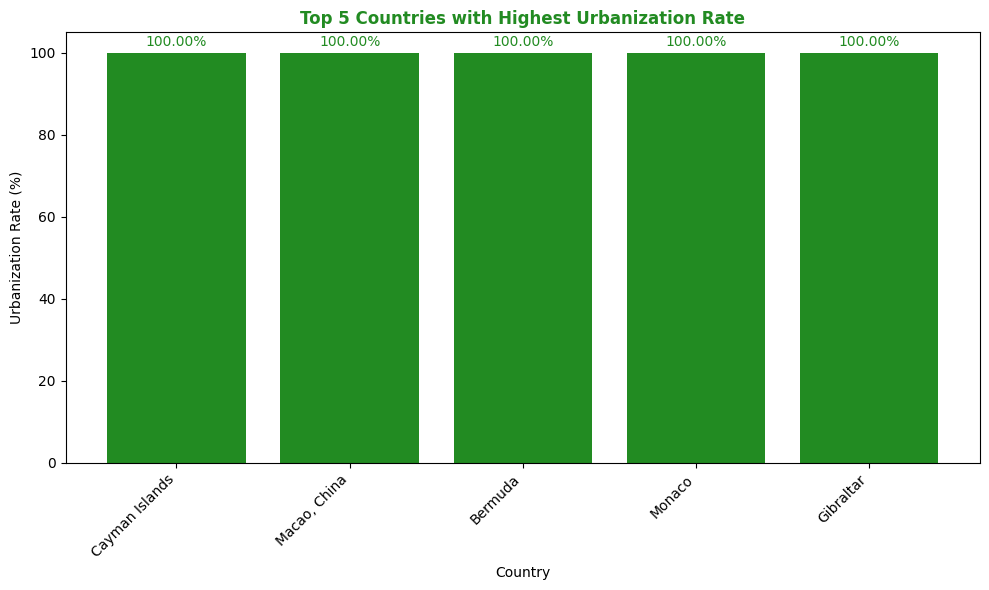

In [32]:

# Read the data from CSV
df = pd.read_csv('2020dataset.csv')

# Sort the DataFrame by 'urbanrate' column in descending order and take the top 5 countries
sorted_df_high_urban = df.sort_values(by='urbanrate', ascending=False).head(5)

# Plotting the Top 5 Countries with Highest Urbanization Rate
plt.figure(figsize=(10, 6))

bars_high_urban = plt.bar(sorted_df_high_urban['country'], sorted_df_high_urban['urbanrate'], color='#228B22')

plt.xlabel('Country')
plt.ylabel('Urbanization Rate (%)')
plt.title('Top 5 Countries with Highest Urbanization Rate', fontweight='bold', color='#228B22')
plt.xticks(rotation=45, ha='right')

for bar in bars_high_urban:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords="offset points", ha='center', va='bottom', color='#228B22')

plt.tight_layout()
plt.show()


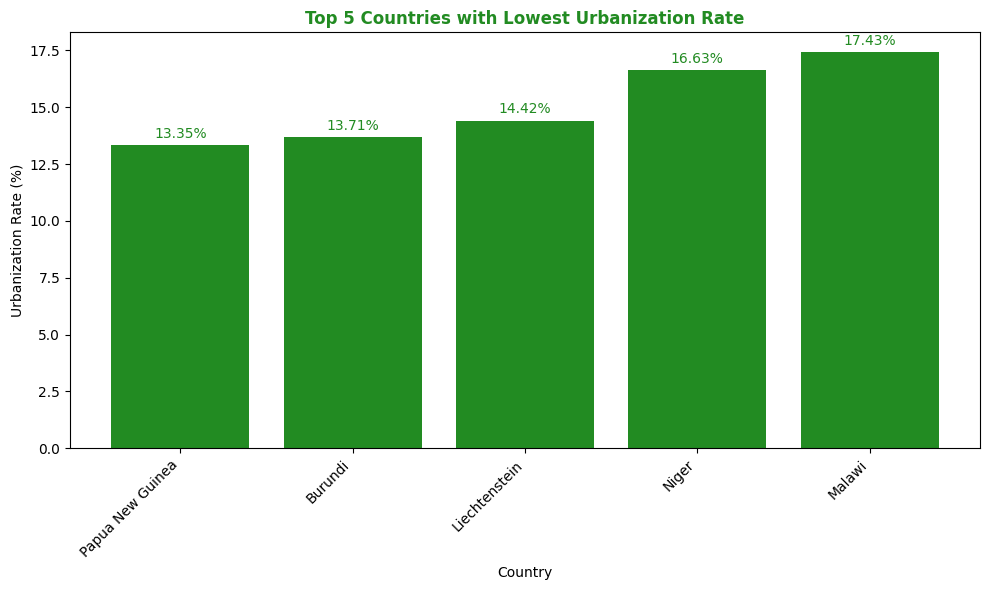

In [33]:
# Sort the DataFrame by 'urbanrate' column in ascending order and take the top 5 countries
sorted_df_low_urban = df.sort_values(by='urbanrate', ascending=True).head(5)

# Plotting the Top 5 Countries with Lowest Urbanization Rate
plt.figure(figsize=(10, 6))

bars_low_urban = plt.bar(sorted_df_low_urban['country'], sorted_df_low_urban['urbanrate'], color='#228B22')

plt.xlabel('Country')
plt.ylabel('Urbanization Rate (%)')
plt.title('Top 5 Countries with Lowest Urbanization Rate', fontweight='bold', color='#228B22')
plt.xticks(rotation=45, ha='right')

for bar in bars_low_urban:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords="offset points", ha='center', va='bottom', color='#228B22')

plt.tight_layout()
plt.show()


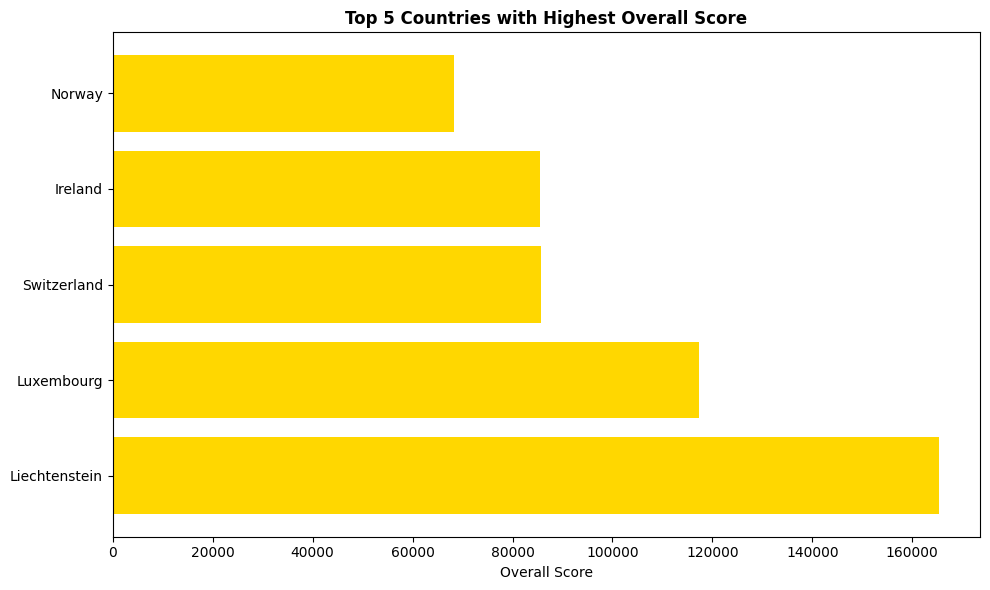

In [34]:
# Read the data from CSV
df = pd.read_csv('2020dataset.csv')

# Drop rows with missing data in specified columns
cols_to_check = ['incomeperperson', 'internetuserate', 'urbanrate']
df = df.dropna(subset=cols_to_check)

# Calculate the overall score for each country
df['Overall_Score'] = df[cols_to_check].max(axis=1)

# Sort the DataFrame by 'Overall_Score' column in descending order and take the top 5 countries
sorted_df_high_score = df.sort_values(by='Overall_Score', ascending=False).head(5)

# Plotting the Top 5 Countries with Highest Overall Score
plt.figure(figsize=(10, 6))

bars_high_score = plt.barh(sorted_df_high_score['country'], sorted_df_high_score['Overall_Score'], color='#FFD700')

plt.xlabel('Overall Score')
plt.title('Top 5 Countries with Highest Overall Score', fontweight='bold', color='black')

plt.tight_layout()
plt.show()


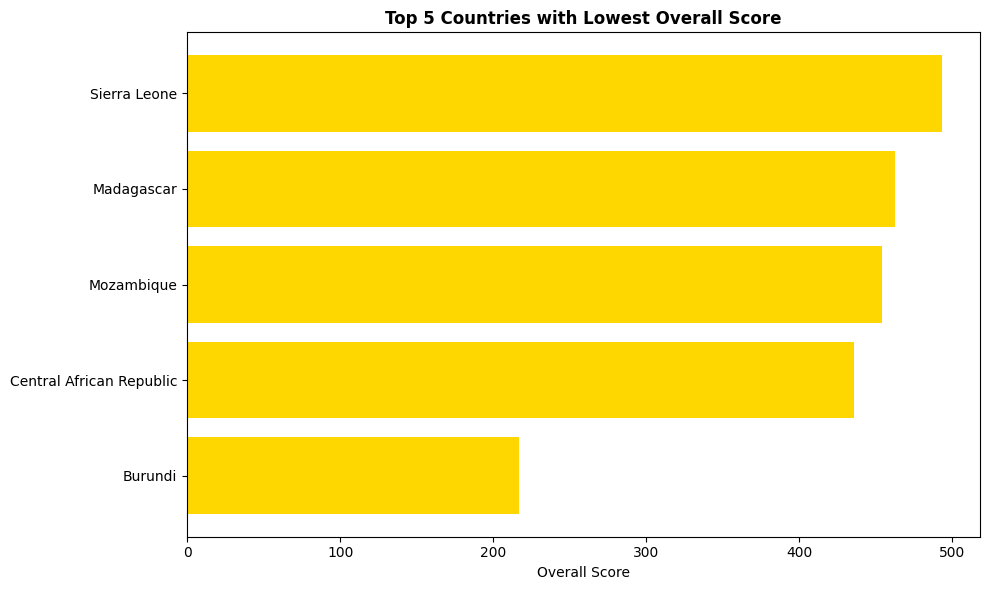

In [35]:
# Sort the DataFrame by 'Overall_Score' column in ascending order and take the top 5 countries
sorted_df_low_score = df.sort_values(by='Overall_Score', ascending=True).head(5)

# Plotting the Top 5 Countries with Lowest Overall Score
plt.figure(figsize=(10, 6))

bars_low_score = plt.barh(sorted_df_low_score['country'], sorted_df_low_score['Overall_Score'], color='#FFD700')

plt.xlabel('Overall Score')
plt.title('Top 5 Countries with Lowest Overall Score', fontweight='bold', color='black')

plt.tight_layout()
plt.show()


# Overall trends.


Between 2000 and 2020, global income experienced growth by over, but this increase predominantly favored higher-income countries. This was a result of favorable economic policies, advantageous trade relations, and increased investments in those countries. Meanwhile, internet accessibility expanded worldwide, with the most significant strides seen in Asia, notably in Gulf nations.

Smaller countries, islands, and overseas territories underwent heightened urbanization due to their emergence as tax havens. For instance, the Cayman Islands, Macau, and Bermuda exemplify this trend. By offering favorable tax regulations, they attracted businesses and individuals seeking to optimize their tax obligations. As a consequence, these areas experienced notable economic expansion, driving urban development in the process.


# Average distribution of values by continent

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\2570191988.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\2570191988.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\2570191988.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

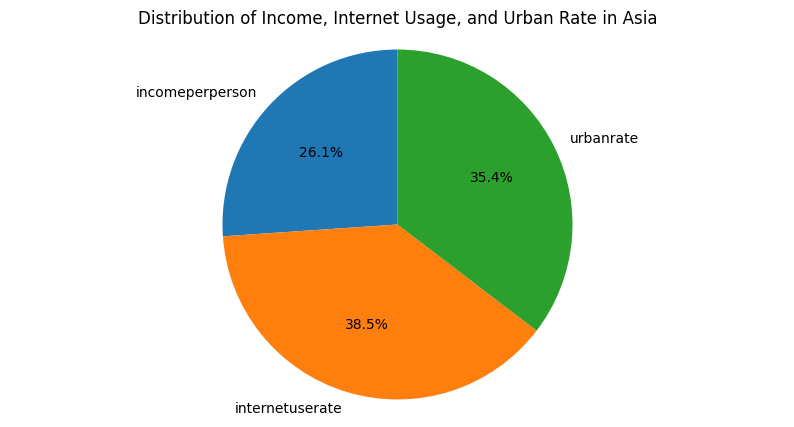

In [36]:
# Read the data from the CSV file into a pandas DataFrame
data = pd.read_csv('2020dataset.csv')

# Define the function to normalize a column
def normalize_column(col, avg_val):
    return col / avg_val

# Calculate overall averages for normalization
overall_avg_income = data['incomeperperson'].mean()
overall_avg_internet = data['internetuserate'].mean()
overall_avg_urban = data['urbanrate'].mean()

# Filter data for the 'Asia' continent
asia_data = data[data['continent'] == 'Asia']

# Normalize the data for 'Asia' using the defined normalization function
asia_data['incomeperperson'] = normalize_column(asia_data['incomeperperson'], overall_avg_income)
asia_data['internetuserate'] = normalize_column(asia_data['internetuserate'], overall_avg_internet)
asia_data['urbanrate'] = normalize_column(asia_data['urbanrate'], overall_avg_urban)

# Define the variables for which we want to compute mean values
variables = ['incomeperperson', 'internetuserate', 'urbanrate']

# Compute mean values for the normalized variables in 'Asia'
asia_mean_values = asia_data[variables].mean()

# Create the pie chart for 'Asia'
fig, ax = plt.subplots()
ax.pie(asia_mean_values, labels=variables, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Set the title for the pie chart
ax.set_title("Distribution of Income, Internet Usage, and Urban Rate in Asia")

# Display the pie chart
plt.show()


C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\2333048908.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\2333048908.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\2333048908.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

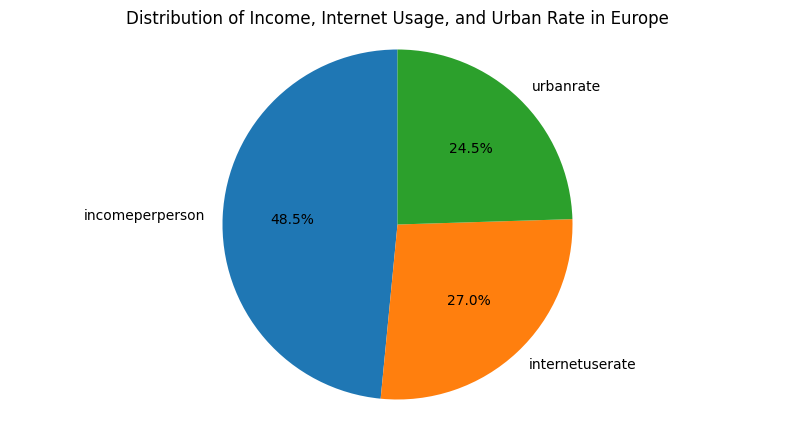

In [37]:
# Filter data for Europe
europe_data = data[data['continent'] == 'Europe']

# Normalize the data for Europe
europe_data['incomeperperson'] = normalize_column(europe_data['incomeperperson'], overall_avg_income)
europe_data['internetuserate'] = normalize_column(europe_data['internetuserate'], overall_avg_internet)
europe_data['urbanrate'] = normalize_column(europe_data['urbanrate'], overall_avg_urban)

# Compute mean values for Europe
europe_mean_values = europe_data[variables].mean()

# Create the pie chart for Europe
fig, ax = plt.subplots()
ax.pie(europe_mean_values, labels=variables, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title("Distribution of Income, Internet Usage, and Urban Rate in Europe")
plt.show()


C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\1283620628.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\1283620628.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\1283620628.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

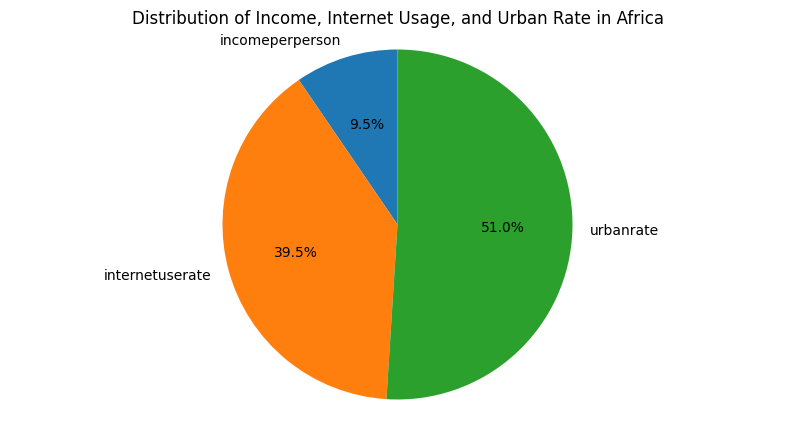

In [38]:
# ... (import statements and data reading)

# Filter data for Africa
europe_data = data[data['continent'] == 'Africa']

# Normalize the data for Africa
europe_data['incomeperperson'] = normalize_column(europe_data['incomeperperson'], overall_avg_income)
europe_data['internetuserate'] = normalize_column(europe_data['internetuserate'], overall_avg_internet)
europe_data['urbanrate'] = normalize_column(europe_data['urbanrate'], overall_avg_urban)

# Compute mean values for Africa
europe_mean_values = europe_data[variables].mean()

# Create the pie chart for Africa
fig, ax = plt.subplots()
ax.pie(europe_mean_values, labels=variables, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title("Distribution of Income, Internet Usage, and Urban Rate in Africa")
plt.show()


C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\3869701078.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\3869701078.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\3869701078.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

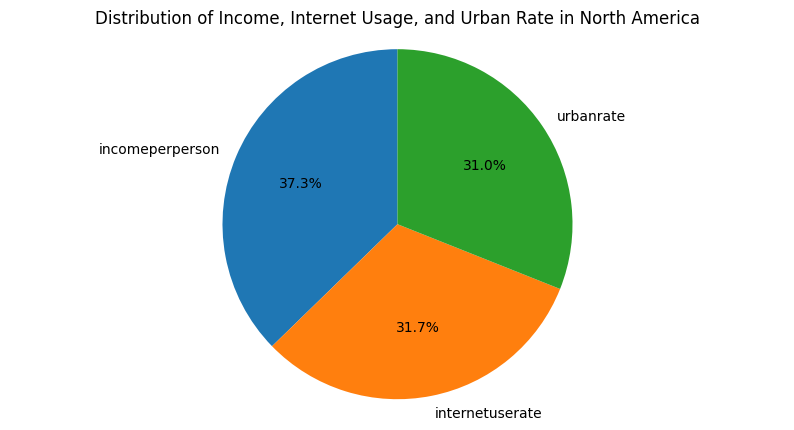

In [39]:
# Filter data for North America
north_america_data = data[data['continent'] == 'North America']

# Normalize the data for North America
north_america_data['incomeperperson'] = normalize_column(north_america_data['incomeperperson'], overall_avg_income)
north_america_data['internetuserate'] = normalize_column(north_america_data['internetuserate'], overall_avg_internet)
north_america_data['urbanrate'] = normalize_column(north_america_data['urbanrate'], overall_avg_urban)

# Compute mean values for North America
north_america_mean_values = north_america_data[variables].mean()

# Create the pie chart for North America
fig, ax = plt.subplots()
ax.pie(north_america_mean_values, labels=variables, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title("Distribution of Income, Internet Usage, and Urban Rate in North America")
plt.show()


C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\2074026355.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\2074026355.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\2074026355.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

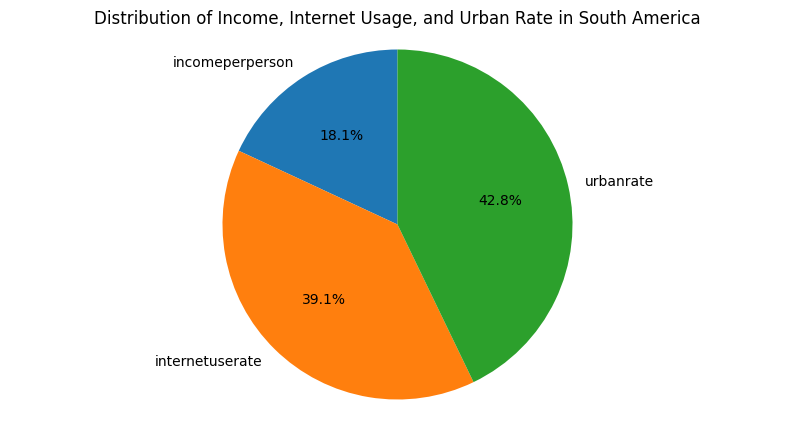

In [40]:
# Filter data for South America
south_america_data = data[data['continent'] == 'South America']

# Normalize the data for South America
south_america_data['incomeperperson'] = normalize_column(south_america_data['incomeperperson'], overall_avg_income)
south_america_data['internetuserate'] = normalize_column(south_america_data['internetuserate'], overall_avg_internet)
south_america_data['urbanrate'] = normalize_column(south_america_data['urbanrate'], overall_avg_urban)

# Compute mean values for South America
south_america_mean_values = south_america_data[variables].mean()

# Create the pie chart for South America
fig, ax = plt.subplots()
ax.pie(south_america_mean_values, labels=variables, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title("Distribution of Income, Internet Usage, and Urban Rate in South America")
plt.show()


C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\891605182.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\891605182.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\891605182.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

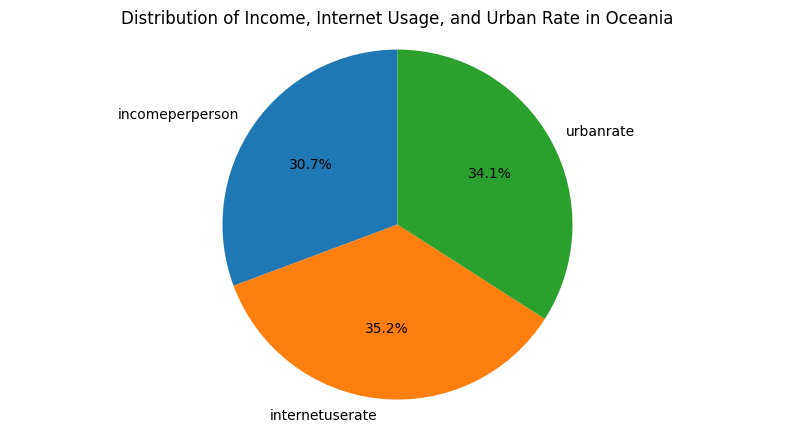

In [41]:
# Filter data for Oceania
oceania_data = data[data['continent'] == 'Oceania']

# Normalize the data for Oceania
oceania_data['incomeperperson'] = normalize_column(oceania_data['incomeperperson'], overall_avg_income)
oceania_data['internetuserate'] = normalize_column(oceania_data['internetuserate'], overall_avg_internet)
oceania_data['urbanrate'] = normalize_column(oceania_data['urbanrate'], overall_avg_urban)

# Compute mean values for Oceania
oceania_mean_values = oceania_data[variables].mean()

# Create the pie chart for Oceania
fig, ax = plt.subplots()
ax.pie(oceania_mean_values, labels=variables, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title("Distribution of Income, Internet Usage, and Urban Rate in Oceania")
plt.show()


C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\115888529.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\115888529.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ROHAAN ADNAN\AppData\Local\Temp\ipykernel_26992\115888529.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

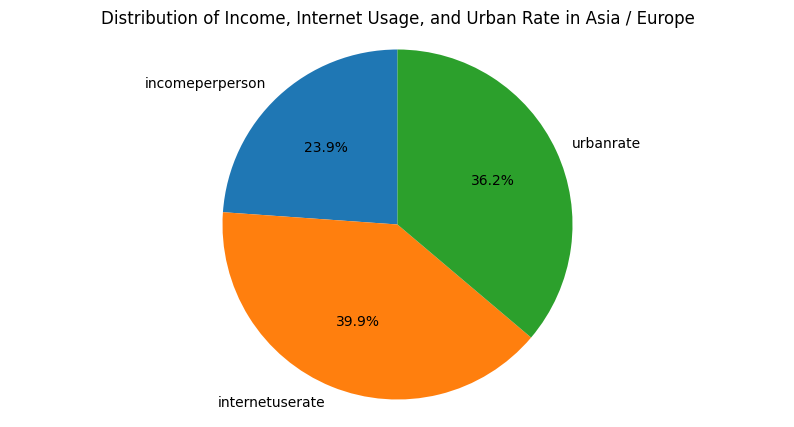

In [42]:
# Filter data for Asia / Europe
asia_europe_data = data[data['continent'] == 'Asia / Europe']

# Normalize the data for Asia / Europe
asia_europe_data['incomeperperson'] = normalize_column(asia_europe_data['incomeperperson'], overall_avg_income)
asia_europe_data['internetuserate'] = normalize_column(asia_europe_data['internetuserate'], overall_avg_internet)
asia_europe_data['urbanrate'] = normalize_column(asia_europe_data['urbanrate'], overall_avg_urban)

# Compute mean values for Asia / Europe
asia_europe_mean_values = asia_europe_data[variables].mean()

# Create the pie chart for Asia / Europe
fig, ax = plt.subplots()
ax.pie(asia_europe_mean_values, labels=variables, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title("Distribution of Income, Internet Usage, and Urban Rate in Asia / Europe")
plt.show()


# Interesting findings

**Gibraltar's High Urban Rate:**
Gibraltar's high urban rate is primarily due to its small land area and high population density. The region's strategic location at the entrance of the Mediterranean Sea has led to its development as a major port, trading hub, and financial centre. The limited available land for expansion has prompted vertical urban development.


**Island Countries Sinking:**
   Some island nations ot are facing the threat of sinking due to rising sea levels caused by climate change. These nations are at risk of losing land and even becoming uninhabitable in the future. Examples include:
   - **Maldives**, an island nation known for its stunning beaches and clear waters but also threatened by sea level rise.
   - **Kiribati**, consisting of low-lying atolls and being one of the most vulnerable nations to sea level rise.
   - **Tuvalu**, a small island country facing similar challenges due to its low elevation.


**Countries That No Longer Exist**:
   - **Czech Rep.**, now the official name after the split of Czechoslovakia.
   - **Serbia and Montenegro**, a union dissolved in 2006, leading to the separate existence of Serbia and Montenegro.
   - **Netherlands Antilles**, a former constituent country of the Kingdom of the Netherlands dissolved in 2010, with its territories becoming special municipalities within the Netherlands.


**Tax Incentives or Tax Havens:**
   Several countries on are known for their favorable tax policies or status as tax havens. These include:
   - **Andorra**, with low taxes and banking secrecy.
   - **Bermuda**, famous for no corporate income tax.
   - **Cayman Islands**, considered a tax haven due to no direct taxes.
   - **Gibraltar**, known for low taxes and a favorable business environment.
   - **Hong Kong, China**, historically recognized for its low taxation and business-friendly atmosphere.
   - **Liechtenstein**, a country known for its favorable tax environment and financial services.
   - **Luxembourg**, attracting businesses with favorable tax regulations.
   - **Macao, China**, featuring a low-tax environment and a well-established gaming industry.
   - **Monaco**, a well-known tax haven with no personal income tax.


# In summary

**Europe:**
- Income levels in European countries vary, with Western European nations generally having higher incomes compared to Eastern Europe.
- Western European countries tend to have higher rates of urbanization and internet usage compared to Eastern European counterparts.


**Africa:**
- Africa continues to address challenges stemming from historical European colonialism, including resource exploitation and economic disparities.
- Efforts to overcome these challenges involve investments in education, sustainable development, and local empowerment.


**North America and Oceania:**
- North American countries (USA, Canada) and Oceania (Australia) exhibit relatively balanced income, urbanization, and internet usage rates.
- Development in these regions is characterized by stable economies and well-developed infrastructures.


**Asia:**
- Asia's development landscape is diverse.
- Countries like China, Japan, and South Korea have made significant strides over time, transitioning from low-income economies to global economic leaders.
- Certain Asian countries (e.g., UAE, Qatar) in the Middle East are experiencing rapid advancement due to strategic investments and resource wealth.
- The region also includes stark contrasts, with some nations progressing while others, like Iraq and Lebanon, grapple with hindrances due to conflict and instability.

**South America:**
- Urban development is a focal point for progress in South America.
- While advancements are evident, the process is slower due to factors like political instability and internal inequalities.
- Progress in this region requires addressing historical imbalances and implementing long-term strategies for equitable development.

# Fin 🙂